In [1]:
print (sc.version)

2.4.0-cdh6.3.0


In [2]:
import os
import shutil
#import sh
import numpy as np
from pyspark.sql.functions import *
#from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import col, trim, lower

In [3]:
!hadoop fs -ls hdfs:///user/ivy2/Tweets/

Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0
Found 30488 items
-rw-r--r--   3 ivy2 ivy2   55220293 2017-06-22 10:15 hdfs:///user/ivy2/Tweets/tweets201706221015.json
-rw-r--r--   3 ivy2 ivy2   52384528 2017-06-22 11:15 hdfs:///user/ivy2/Tweets/tweets201706221115.json
-rw-r--r--   3 ivy2 ivy2   56190692 2017-06-22 12:15 hdfs:///user/ivy2/Tweets/tweets201706221215.json
-rw-r--r--   3 ivy2 ivy2   56992695 2017-06-22 13:15 hdfs:///user/ivy2/Tweets/tweets201706221315.json
-rw-r--r--   3 ivy2 ivy2   54702790 2017-06-22 14:15 hdfs:///user/ivy2/Tweets/tweets201706221415.json
-rw-r--r--   3 ivy2 ivy2   66415029 2017-06-22 15:15 hdfs:///user/ivy2/Tweets/tweets201706221515.json
-rw-r--r--   3 ivy2 ivy2   63298555 2017-06-22 16:15 hdfs:///user/ivy2/Tweets/tweets201706221615.json
-rw-r--r--   3 ivy2 ivy2   55417269 2017-06-22 17:15 hdfs:///user/ivy2/Tweets/tweets201706221715.json
-rw-r--r--   3 ivy2 ivy2   54057246 2017-06-22 18:15 hdfs:///u

-rw-r--r--   3 ivy2 ivy2   19761291 2017-07-01 04:15 hdfs:///user/ivy2/Tweets/tweets201707010415.json
-rw-r--r--   3 ivy2 ivy2   18170310 2017-07-01 05:15 hdfs:///user/ivy2/Tweets/tweets201707010515.json
-rw-r--r--   3 ivy2 ivy2   21193452 2017-07-01 06:15 hdfs:///user/ivy2/Tweets/tweets201707010615.json
-rw-r--r--   3 ivy2 ivy2   32135024 2017-07-01 07:15 hdfs:///user/ivy2/Tweets/tweets201707010715.json
-rw-r--r--   3 ivy2 ivy2   42222221 2017-07-01 08:15 hdfs:///user/ivy2/Tweets/tweets201707010815.json
-rw-r--r--   3 ivy2 ivy2   48274239 2017-07-01 09:15 hdfs:///user/ivy2/Tweets/tweets201707010915.json
-rw-r--r--   3 ivy2 ivy2   56087247 2017-07-01 10:15 hdfs:///user/ivy2/Tweets/tweets201707011015.json
-rw-r--r--   3 ivy2 ivy2   63845635 2017-07-01 11:15 hdfs:///user/ivy2/Tweets/tweets201707011115.json
-rw-r--r--   3 ivy2 ivy2   63269670 2017-07-01 12:15 hdfs:///user/ivy2/Tweets/tweets201707011215.json
-rw-r--r--   3 ivy2 ivy2   55100426 2017-07-01 13:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2   57142896 2017-08-29 16:15 hdfs:///user/ivy2/Tweets/tweets201708291615.json
-rw-r--r--   3 ivy2 ivy2   49162734 2017-08-29 17:15 hdfs:///user/ivy2/Tweets/tweets201708291715.json
-rw-r--r--   3 ivy2 ivy2   51584883 2017-08-29 18:15 hdfs:///user/ivy2/Tweets/tweets201708291815.json
-rw-r--r--   3 ivy2 ivy2   48576139 2017-08-29 19:15 hdfs:///user/ivy2/Tweets/tweets201708291915.json
-rw-r--r--   3 ivy2 ivy2   53630677 2017-08-29 20:15 hdfs:///user/ivy2/Tweets/tweets201708292015.json
-rw-r--r--   3 ivy2 ivy2  119268872 2017-08-29 21:15 hdfs:///user/ivy2/Tweets/tweets201708292115.json
-rw-r--r--   3 ivy2 ivy2  124794961 2017-08-29 22:15 hdfs:///user/ivy2/Tweets/tweets201708292215.json
-rw-r--r--   3 ivy2 ivy2   92584870 2017-08-29 23:15 hdfs:///user/ivy2/Tweets/tweets201708292315.json
-rw-r--r--   3 ivy2 ivy2   64131493 2017-08-30 00:15 hdfs:///user/ivy2/Tweets/tweets201708300015.json
-rw-r--r--   3 ivy2 ivy2   43491456 2017-08-30 01:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2   81994684 2017-12-02 22:15 hdfs:///user/ivy2/Tweets/tweets201712022215.json
-rw-r--r--   3 ivy2 ivy2   68919200 2017-12-02 23:15 hdfs:///user/ivy2/Tweets/tweets201712022315.json
-rw-r--r--   3 ivy2 ivy2   56110050 2017-12-03 00:15 hdfs:///user/ivy2/Tweets/tweets201712030015.json
-rw-r--r--   3 ivy2 ivy2   44896343 2017-12-03 01:15 hdfs:///user/ivy2/Tweets/tweets201712030115.json
-rw-r--r--   3 ivy2 ivy2   36815894 2017-12-03 02:15 hdfs:///user/ivy2/Tweets/tweets201712030215.json
-rw-r--r--   3 ivy2 ivy2   32139388 2017-12-03 03:15 hdfs:///user/ivy2/Tweets/tweets201712030315.json
-rw-r--r--   3 ivy2 ivy2   33745490 2017-12-03 04:15 hdfs:///user/ivy2/Tweets/tweets201712030415.json
-rw-r--r--   3 ivy2 ivy2   31612723 2017-12-03 05:15 hdfs:///user/ivy2/Tweets/tweets201712030515.json
-rw-r--r--   3 ivy2 ivy2   37235133 2017-12-03 06:15 hdfs:///user/ivy2/Tweets/tweets201712030615.json
-rw-r--r--   3 ivy2 ivy2   40374249 2017-12-03 07:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2  196605513 2018-03-14 18:15 hdfs:///user/ivy2/Tweets/tweets201803141815.json
-rw-r--r--   3 ivy2 ivy2  190802899 2018-03-14 19:15 hdfs:///user/ivy2/Tweets/tweets201803141915.json
-rw-r--r--   3 ivy2 ivy2  197374456 2018-03-14 20:15 hdfs:///user/ivy2/Tweets/tweets201803142015.json
-rw-r--r--   3 ivy2 ivy2  200222286 2018-03-14 21:15 hdfs:///user/ivy2/Tweets/tweets201803142115.json
-rw-r--r--   3 ivy2 ivy2  199132080 2018-03-14 22:15 hdfs:///user/ivy2/Tweets/tweets201803142215.json
-rw-r--r--   3 ivy2 ivy2  182373369 2018-03-14 23:15 hdfs:///user/ivy2/Tweets/tweets201803142315.json
-rw-r--r--   3 ivy2 ivy2  147622448 2018-03-15 00:15 hdfs:///user/ivy2/Tweets/tweets201803150015.json
-rw-r--r--   3 ivy2 ivy2  108637555 2018-03-15 01:15 hdfs:///user/ivy2/Tweets/tweets201803150115.json
-rw-r--r--   3 ivy2 ivy2   89386052 2018-03-15 02:15 hdfs:///user/ivy2/Tweets/tweets201803150215.json
-rw-r--r--   3 ivy2 ivy2   80952535 2018-03-15 03:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2   65651519 2018-07-08 15:15 hdfs:///user/ivy2/Tweets/tweets201807081515.json
-rw-r--r--   3 ivy2 ivy2   60223960 2018-07-08 16:15 hdfs:///user/ivy2/Tweets/tweets201807081615.json
-rw-r--r--   3 ivy2 ivy2   53471203 2018-07-08 17:15 hdfs:///user/ivy2/Tweets/tweets201807081715.json
-rw-r--r--   3 ivy2 ivy2   57158416 2018-07-08 18:15 hdfs:///user/ivy2/Tweets/tweets201807081815.json
-rw-r--r--   3 ivy2 ivy2   68957296 2018-07-08 19:15 hdfs:///user/ivy2/Tweets/tweets201807081915.json
-rw-r--r--   3 ivy2 ivy2   61830701 2018-07-08 20:15 hdfs:///user/ivy2/Tweets/tweets201807082015.json
-rw-r--r--   3 ivy2 ivy2   59092303 2018-07-08 21:15 hdfs:///user/ivy2/Tweets/tweets201807082115.json
-rw-r--r--   3 ivy2 ivy2   60504111 2018-07-08 22:15 hdfs:///user/ivy2/Tweets/tweets201807082215.json
-rw-r--r--   3 ivy2 ivy2   52215675 2018-07-08 23:15 hdfs:///user/ivy2/Tweets/tweets201807082315.json
-rw-r--r--   3 ivy2 ivy2   43179866 2018-07-09 00:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2   33924287 2018-11-03 03:15 hdfs:///user/ivy2/Tweets/tweets201811030315.json
-rw-r--r--   3 ivy2 ivy2   33837213 2018-11-03 04:15 hdfs:///user/ivy2/Tweets/tweets201811030415.json
-rw-r--r--   3 ivy2 ivy2   30645784 2018-11-03 05:15 hdfs:///user/ivy2/Tweets/tweets201811030515.json
-rw-r--r--   3 ivy2 ivy2   32252923 2018-11-03 06:15 hdfs:///user/ivy2/Tweets/tweets201811030615.json
-rw-r--r--   3 ivy2 ivy2   37150654 2018-11-03 07:15 hdfs:///user/ivy2/Tweets/tweets201811030715.json
-rw-r--r--   3 ivy2 ivy2   57360629 2018-11-03 08:15 hdfs:///user/ivy2/Tweets/tweets201811030815.json
-rw-r--r--   3 ivy2 ivy2   69414698 2018-11-03 09:15 hdfs:///user/ivy2/Tweets/tweets201811030915.json
-rw-r--r--   3 ivy2 ivy2   94724013 2018-11-03 11:15 hdfs:///user/ivy2/Tweets/tweets201811031115.json
-rw-r--r--   3 ivy2 ivy2   84030083 2018-11-03 12:15 hdfs:///user/ivy2/Tweets/tweets201811031215.json
-rw-r--r--   3 ivy2 ivy2   79934201 2018-11-03 13:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2   34098745 2019-01-19 03:15 hdfs:///user/ivy2/Tweets/tweets201901190315.json
-rw-r--r--   3 ivy2 ivy2   32107121 2019-01-19 04:15 hdfs:///user/ivy2/Tweets/tweets201901190415.json
-rw-r--r--   3 ivy2 ivy2   32960273 2019-01-19 05:15 hdfs:///user/ivy2/Tweets/tweets201901190515.json
-rw-r--r--   3 ivy2 ivy2   35029453 2019-01-19 06:15 hdfs:///user/ivy2/Tweets/tweets201901190615.json
-rw-r--r--   3 ivy2 ivy2   45360690 2019-01-19 07:15 hdfs:///user/ivy2/Tweets/tweets201901190715.json
-rw-r--r--   3 ivy2 ivy2   61864980 2019-01-19 08:15 hdfs:///user/ivy2/Tweets/tweets201901190815.json
-rw-r--r--   3 ivy2 ivy2   73896856 2019-01-19 09:15 hdfs:///user/ivy2/Tweets/tweets201901190915.json
-rw-r--r--   3 ivy2 ivy2   82131112 2019-01-19 10:15 hdfs:///user/ivy2/Tweets/tweets201901191015.json
-rw-r--r--   3 ivy2 ivy2   85950923 2019-01-19 11:15 hdfs:///user/ivy2/Tweets/tweets201901191115.json
-rw-r--r--   3 ivy2 ivy2   85545438 2019-01-19 12:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2   37775971 2019-04-27 04:15 hdfs:///user/ivy2/Tweets/tweets201904270415.json
-rw-r--r--   3 ivy2 ivy2   35662997 2019-04-27 05:15 hdfs:///user/ivy2/Tweets/tweets201904270515.json
-rw-r--r--   3 ivy2 ivy2   39872459 2019-04-27 06:15 hdfs:///user/ivy2/Tweets/tweets201904270615.json
-rw-r--r--   3 ivy2 ivy2   48615517 2019-04-27 07:15 hdfs:///user/ivy2/Tweets/tweets201904270715.json
-rw-r--r--   3 ivy2 ivy2   58371260 2019-04-27 08:15 hdfs:///user/ivy2/Tweets/tweets201904270815.json
-rw-r--r--   3 ivy2 ivy2   65336060 2019-04-27 09:15 hdfs:///user/ivy2/Tweets/tweets201904270915.json
-rw-r--r--   3 ivy2 ivy2   67030542 2019-04-27 10:15 hdfs:///user/ivy2/Tweets/tweets201904271015.json
-rw-r--r--   3 ivy2 ivy2   66985222 2019-04-27 11:15 hdfs:///user/ivy2/Tweets/tweets201904271115.json
-rw-r--r--   3 ivy2 ivy2   68588106 2019-04-27 12:15 hdfs:///user/ivy2/Tweets/tweets201904271215.json
-rw-r--r--   3 ivy2 ivy2   88660760 2019-04-27 13:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2   87306815 2019-07-25 19:15 hdfs:///user/ivy2/Tweets/tweets201907251915.json
-rw-r--r--   3 ivy2 ivy2  100552704 2019-07-25 20:15 hdfs:///user/ivy2/Tweets/tweets201907252015.json
-rw-r--r--   3 ivy2 ivy2   94705722 2019-07-25 21:15 hdfs:///user/ivy2/Tweets/tweets201907252115.json
-rw-r--r--   3 ivy2 ivy2   88309535 2019-07-25 22:15 hdfs:///user/ivy2/Tweets/tweets201907252215.json
-rw-r--r--   3 ivy2 ivy2   83041015 2019-07-25 23:15 hdfs:///user/ivy2/Tweets/tweets201907252315.json
-rw-r--r--   3 ivy2 ivy2   72837125 2019-07-26 00:15 hdfs:///user/ivy2/Tweets/tweets201907260015.json
-rw-r--r--   3 ivy2 ivy2   61754572 2019-07-26 01:15 hdfs:///user/ivy2/Tweets/tweets201907260115.json
-rw-r--r--   3 ivy2 ivy2   50995104 2019-07-26 02:15 hdfs:///user/ivy2/Tweets/tweets201907260215.json
-rw-r--r--   3 ivy2 ivy2   45705585 2019-07-26 03:15 hdfs:///user/ivy2/Tweets/tweets201907260315.json
-rw-r--r--   3 ivy2 ivy2   41781803 2019-07-26 04:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2   55254099 2019-10-07 23:15 hdfs:///user/ivy2/Tweets/tweets201910072315.json
-rw-r--r--   3 ivy2 ivy2   56067191 2019-10-08 00:15 hdfs:///user/ivy2/Tweets/tweets201910080015.json
-rw-r--r--   3 ivy2 ivy2   61400984 2019-10-08 01:15 hdfs:///user/ivy2/Tweets/tweets201910080115.json
-rw-r--r--   3 ivy2 ivy2   66294921 2019-10-08 02:15 hdfs:///user/ivy2/Tweets/tweets201910080215.json
-rw-r--r--   3 ivy2 ivy2   63713884 2019-10-08 03:15 hdfs:///user/ivy2/Tweets/tweets201910080315.json
-rw-r--r--   3 ivy2 ivy2   64137246 2019-10-08 04:15 hdfs:///user/ivy2/Tweets/tweets201910080415.json
-rw-r--r--   3 ivy2 ivy2   62951147 2019-10-08 05:15 hdfs:///user/ivy2/Tweets/tweets201910080515.json
-rw-r--r--   3 ivy2 ivy2   69640243 2019-10-08 06:15 hdfs:///user/ivy2/Tweets/tweets201910080615.json
-rw-r--r--   3 ivy2 ivy2   80440974 2019-10-08 07:15 hdfs:///user/ivy2/Tweets/tweets201910080715.json
-rw-r--r--   3 ivy2 ivy2   82165431 2019-10-08 08:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2   49506921 2019-12-14 03:15 hdfs:///user/ivy2/Tweets/tweets201912140315.json
-rw-r--r--   3 ivy2 ivy2   47666737 2019-12-14 04:15 hdfs:///user/ivy2/Tweets/tweets201912140415.json
-rw-r--r--   3 ivy2 ivy2   52148139 2019-12-14 05:15 hdfs:///user/ivy2/Tweets/tweets201912140515.json
-rw-r--r--   3 ivy2 ivy2   52128147 2019-12-14 06:15 hdfs:///user/ivy2/Tweets/tweets201912140615.json
-rw-r--r--   3 ivy2 ivy2   56892381 2019-12-14 07:15 hdfs:///user/ivy2/Tweets/tweets201912140715.json
-rw-r--r--   3 ivy2 ivy2   70168522 2019-12-14 08:15 hdfs:///user/ivy2/Tweets/tweets201912140815.json
-rw-r--r--   3 ivy2 ivy2   77398783 2019-12-14 09:15 hdfs:///user/ivy2/Tweets/tweets201912140915.json
-rw-r--r--   3 ivy2 ivy2   81250941 2019-12-14 10:15 hdfs:///user/ivy2/Tweets/tweets201912141015.json
-rw-r--r--   3 ivy2 ivy2   78864008 2019-12-14 11:15 hdfs:///user/ivy2/Tweets/tweets201912141115.json
-rw-r--r--   3 ivy2 ivy2   79024583 2019-12-14 12:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2   62575163 2020-02-19 23:15 hdfs:///user/ivy2/Tweets/tweets202002192315.json
-rw-r--r--   3 ivy2 ivy2   55826217 2020-02-20 00:15 hdfs:///user/ivy2/Tweets/tweets202002200015.json
-rw-r--r--   3 ivy2 ivy2   47227859 2020-02-20 01:15 hdfs:///user/ivy2/Tweets/tweets202002200115.json
-rw-r--r--   3 ivy2 ivy2   44169732 2020-02-20 02:15 hdfs:///user/ivy2/Tweets/tweets202002200215.json
-rw-r--r--   3 ivy2 ivy2   50710522 2020-02-20 03:15 hdfs:///user/ivy2/Tweets/tweets202002200315.json
-rw-r--r--   3 ivy2 ivy2   48221876 2020-02-20 04:15 hdfs:///user/ivy2/Tweets/tweets202002200415.json
-rw-r--r--   3 ivy2 ivy2   49339476 2020-02-20 05:15 hdfs:///user/ivy2/Tweets/tweets202002200515.json
-rw-r--r--   3 ivy2 ivy2   55301152 2020-02-20 06:15 hdfs:///user/ivy2/Tweets/tweets202002200615.json
-rw-r--r--   3 ivy2 ivy2   65397442 2020-02-20 07:15 hdfs:///user/ivy2/Tweets/tweets202002200715.json
-rw-r--r--   3 ivy2 ivy2   77737931 2020-02-20 08:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2   58382569 2020-04-26 09:15 hdfs:///user/ivy2/Tweets/tweets202004260915.json
-rw-r--r--   3 ivy2 ivy2   69184767 2020-04-26 10:15 hdfs:///user/ivy2/Tweets/tweets202004261015.json
-rw-r--r--   3 ivy2 ivy2   79832009 2020-04-26 11:15 hdfs:///user/ivy2/Tweets/tweets202004261115.json
-rw-r--r--   3 ivy2 ivy2   85155798 2020-04-26 12:15 hdfs:///user/ivy2/Tweets/tweets202004261215.json
-rw-r--r--   3 ivy2 ivy2   85568653 2020-04-26 13:15 hdfs:///user/ivy2/Tweets/tweets202004261315.json
-rw-r--r--   3 ivy2 ivy2   75225101 2020-04-26 14:15 hdfs:///user/ivy2/Tweets/tweets202004261415.json
-rw-r--r--   3 ivy2 ivy2   65430993 2020-04-26 15:15 hdfs:///user/ivy2/Tweets/tweets202004261515.json
-rw-r--r--   3 ivy2 ivy2   68772819 2020-04-26 16:15 hdfs:///user/ivy2/Tweets/tweets202004261615.json
-rw-r--r--   3 ivy2 ivy2   66096056 2020-04-26 17:15 hdfs:///user/ivy2/Tweets/tweets202004261715.json
-rw-r--r--   3 ivy2 ivy2   78304824 2020-04-26 18:15 hdfs:///user/ivy2/Tweets/twee

-rw-r--r--   3 ivy2 ivy2  178917675 2020-07-17 09:15 hdfs:///user/ivy2/Tweets/tweets202007170915.json
-rw-r--r--   3 ivy2 ivy2  217360104 2020-07-17 10:15 hdfs:///user/ivy2/Tweets/tweets202007171015.json
-rw-r--r--   3 ivy2 ivy2  188938759 2020-07-17 11:15 hdfs:///user/ivy2/Tweets/tweets202007171115.json
-rw-r--r--   3 ivy2 ivy2  177216236 2020-07-17 12:15 hdfs:///user/ivy2/Tweets/tweets202007171215.json
-rw-r--r--   3 ivy2 ivy2  181170390 2020-07-17 13:15 hdfs:///user/ivy2/Tweets/tweets202007171315.json
-rw-r--r--   3 ivy2 ivy2  172800969 2020-07-17 14:15 hdfs:///user/ivy2/Tweets/tweets202007171415.json
-rw-r--r--   3 ivy2 ivy2  164426463 2020-07-17 15:15 hdfs:///user/ivy2/Tweets/tweets202007171515.json
-rw-r--r--   3 ivy2 ivy2  142908739 2020-07-17 16:15 hdfs:///user/ivy2/Tweets/tweets202007171615.json
-rw-r--r--   3 ivy2 ivy2  129169294 2020-07-17 17:15 hdfs:///user/ivy2/Tweets/tweets202007171715.json
-rw-r--r--   3 ivy2 ivy2  116563287 2020-07-17 18:15 hdfs:///user/ivy2/Tweets/twee

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
data_frame = spark.read.json("hdfs:///user/ivy2/Tweets/*.json")
data_frame.printSchema()

root
 |-- contributors: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- display_text_range: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- media: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- additional_media_info: struct (nullable = true)
 |    |    |    |    |-- description: string (nullable = true)
 |    |    |    |    |-- embeddable: boolean (nullable = true)
 |    |    |    |    |-- monetizable: bo

In [5]:
df_new = data_frame.selectExpr('created_at',
                               'id as tweet_id',
                                        'source as tweet_source',
                                        'entities.hashtags.text as hashtag_text',
                                        'favorite_count',
                                        'favorited',
                                        'lang',
                                        'possibly_sensitive',
                                        'quote_count',
                                        'reply_count',
                                        'retweet_count',
                                        'retweeted_status.retweet_count as retweet_count_new',
                                        'retweeted',
                                        'text',
                                        'user.id as user_id',
                                        'user.name as user_name',
                                        'user.screen_name as user_screen_name',
                                        'user.location as user_location',
                                        'user.verified as user_verified',
                                        'user.protected as user_protected',
                                        'user.followers_count as user_followers_count',
                                        'user.friends_count as user_friends_count',
                                        'user.listed_count as user_listed_count',
                                        'user.favourites_count as user_favourites_count',
                                        'user.statuses_count as user_statuses_count',
                                        'user.created_at as user_creation_time',
                                        'place.country as tweet_country',
                                       'place.country_code as tweet_country_code',
                                       'place.full_name as tweet_fullplace',
                                       'place.name as tweet_place',
                                       'place.place_type as tweet_place_type',
                                       'extended_entities.media.type as media_type')

In [6]:
df_test = df_new.withColumn("hashtag_text", df_new["hashtag_text"].cast(StringType())).\
withColumn("media_type", df_new["media_type"].cast(StringType()))
#df_test.printSchema()

In [7]:
df_test_new = df_test.withColumn('hashtag_text',regexp_replace(regexp_replace(col('hashtag_text'),"\\[",""),"\\]",""))


#### Identify tweets related to UChicago and 3-4 universities of your choice
    - Choose universities with sufficient tweeter activity
    
  -  UChicago,
  -  Harvard,
  -  Northwestern
  -  Stanford

In [8]:
df_test_new.select('text').show(5,truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                        |
+--------------------------------------------------------------------------------------------------------------------------------------------+
|RT @millselle: my sister graduated from university today https://t.co/ly3fCiX1x5                                                            |
|You clean up nice!😜 https://t.co/U5mw1v3cLb                                                                                                |
|RT @ACEPNow: Mike Wilson (University of Arkansas) was awarded a grant to use this tool in the ED – something you could use, too? https://t.…|
|RT @MikeAScotto: Chicago Bulls and Phoenix Suns have discussed a trade featuring the No. 16 pick and Eric Bledsoe league sources told Baske…|


In [9]:
#### Creating a new retweet flag
df_test_new = df_test_new.withColumn("retweet_flag_updated", when((col("text").like("RT%")), 1).otherwise(0))
df_test_new = df_test_new.withColumn('text',lower(col('text')))

In [10]:
df_test_new = df_test_new.withColumn('date', from_unixtime \
               (unix_timestamp('created_at', 'EEE MMM d HH:mm:ss z yyyy')))
df_test_new = df_test_new.withColumn('year',year("date")).\
withColumn('month',month("date")).\
withColumn('day',dayofmonth("date")).\
withColumn('time_of_day',hour("date"))

#### Creating Flags

Creating flags to identify the tweets associated with university and non-university topics.

We are narrowing our scope to four universities
- **The University of Chicago **
- **Harvard University**
- **Stanford University**
- **Northwestern University**

The following snippet code involves creation of flags to identify the tweets that are associated with their respecitve universities.

In [13]:
from pyspark.sql.functions import col, trim, lower

df_test_new = df_test_new.withColumn("other", when((col("text").contains("university")),0).otherwise(1))

#University tweet flag
df_test_new2 = df_test_new.withColumn("uchicago", when((col("text").contains("university of chicago")),1).otherwise(0)).\
withColumn("harvard", when((col("text").contains("harvard university")),1).otherwise(0)).\
withColumn("stanford", when((col("text").contains("stanford university")),1).otherwise(0)).\
withColumn("northwesternu", when((col("text").contains("northwestern university")),1).otherwise(0)).\
withColumn("university_flag", when((col("text").contains("uchicago") | col("text").contains("harvard") | \
                                    col("text").contains("stanford") | \
                                    col("text").contains("northwesternu")), 1).otherwise(0))


In [14]:
#Filtering for the data that has the university tweets
df_filtered = df_test_new2.filter((col("uchicago") == 1 )|(col("harvard") == 1) | \
(col("stanford") == 1) | (col("northwesternu") == 1) | (col("other") == 1))

df_filtered.select('university_flag','uchicago','text').filter(col("other") == 1).show(2)

+---------------+--------+--------------------+
|university_flag|uchicago|                text|
+---------------+--------+--------------------+
|              0|       0|you clean up nice...|
|              0|       0|rt @mikeascotto: ...|
+---------------+--------+--------------------+
only showing top 2 rows



In [15]:
#Filtering rows where there are nulls in location and time
df_filtered = df_filtered.filter(df_filtered.user_location.isNotNull()).\
filter(df_filtered.date.isNotNull()).\
filter(df_filtered.text.isNotNull())

#### Discard irrelevant tweets
Will be 95%+ of the data

The following command idenitifies the total number of null or NA values in every column, however, the columns should be either string or integer.


In [16]:
df_filtered.printSchema()

import pyspark.sql.functions as f

cols = ["favorited", "retweeted","user_verified","user_protected","possibly_sensitive"]
for col in cols:
    df_filtered = df_filtered.withColumn(
        col, 
        f.when(
            f.col(col) == 'N',
            'False'
        ).when(
            f.col(col) == 'Y',
            'True'
        ).when(
            f.col(col).cast('string') == 'true',
            'True'
        ).when(
            f.col(col).cast('string') == 'false',
            'False'
        ).otherwise(f.col(col).cast('string'))
    )

df_filtered.printSchema()

root
 |-- created_at: string (nullable = true)
 |-- tweet_id: long (nullable = true)
 |-- tweet_source: string (nullable = true)
 |-- hashtag_text: string (nullable = true)
 |-- favorite_count: long (nullable = true)
 |-- favorited: boolean (nullable = true)
 |-- lang: string (nullable = true)
 |-- possibly_sensitive: boolean (nullable = true)
 |-- quote_count: long (nullable = true)
 |-- reply_count: long (nullable = true)
 |-- retweet_count: long (nullable = true)
 |-- retweet_count_new: long (nullable = true)
 |-- retweeted: boolean (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: long (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_screen_name: string (nullable = true)
 |-- user_location: string (nullable = true)
 |-- user_verified: boolean (nullable = true)
 |-- user_protected: boolean (nullable = true)
 |-- user_followers_count: long (nullable = true)
 |-- user_friends_count: long (nullable = true)
 |-- user_listed_count: long (nullable = t

In [17]:
#Converting Boolean columns into Flags
from pyspark.sql.functions import col, trim, lower

df_filtered = df_filtered.withColumn("favorited", when((col("favorited").contains("True")),1).otherwise(0)).\
withColumn("retweeted", when((col("retweeted").contains("True")),1).otherwise(0)).\
withColumn("user_verified", when((col("user_verified").contains("True")),1).otherwise(0)).\
withColumn("possibly_sensitive", when((col("possibly_sensitive").contains("True")),1).otherwise(0))

#### Identify the most prolific / influential Twitterers
    - By message volume
    - By message retweet
    - How much are they tweeting about the Universities vs. other topics?

##### By message volume


In [30]:
#uchicago tweeters
df_count = df_filtered.select('user_name','tweet_id','uchicago').\
filter('uchicago == 1').\
groupby('user_name').\
agg(count('tweet_id').alias('tweet_volume')).\
orderBy('tweet_volume',ascending = False).limit(5).toPandas()
df_count

,user_name,tweet_volume
0,Trucks at UChicago,586
1,Hailey Mitchel,367
2,Sofia,334
3,Taaki,284
4,My name is ...,283


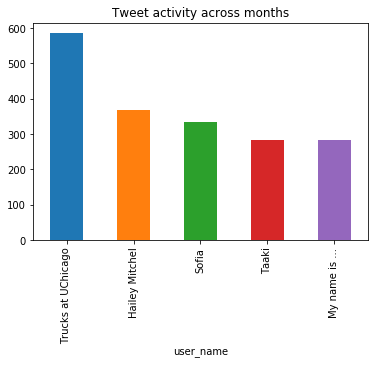

In [32]:
# Plotting the above results
df_count.\
plot(kind='bar', x='user_name', y='tweet_volume', legend=None, title="Tweet activity across months")

Based on the initial assessment, the popular accounts belong to some twitterers and few accounts are related to some activities related to the university


In [34]:
#harvard tweeters
df_count = df_filtered.select('user_name','tweet_id','harvard').\
filter('harvard == 1').\
groupby('user_name').\
agg(count('tweet_id').alias('tweet_volume')).\
orderBy('tweet_volume',ascending = False).limit(5).toPandas()

df_count

,user_name,tweet_volume
0,Krystal,1937
1,harvard-edits,1505
2,정수정,1373
3,.,1307
4,ً,1026


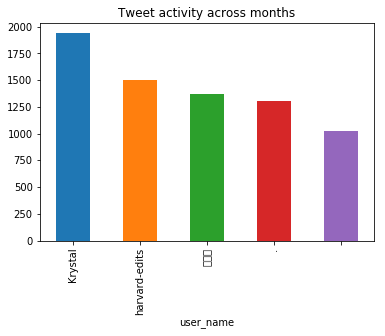

In [35]:
# Plotting the above results
df_count.\
plot(kind='bar', x='user_name', y='tweet_volume', legend=None, title="Tweet activity across months")

Based on the initial assessment, the popular accounts belong to some twitterers and few accounts are related to some activities related to the university

In [36]:
#stanford tweeters
df_count = df_filtered.select('user_name','tweet_id','stanford').\
filter('stanford == 1').\
groupby('user_name').\
agg(count('tweet_id').alias('tweet_volume')).\
orderBy('tweet_volume',ascending = False).limit(5).toPandas()

df_count

,user_name,tweet_volume
0,Fresh Marker!,1794
1,Hailey Mitchel,1117
2,startupcrunch,1060
3,Sofia,1008
4,Kelly B.,964


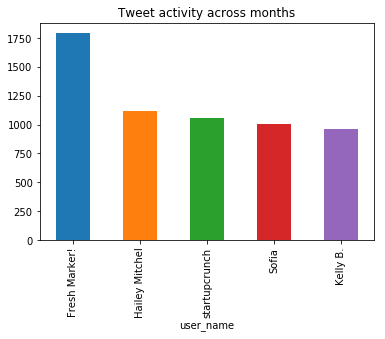

In [37]:
# Plotting the above results
df_count.\
plot(kind='bar', x='user_name', y='tweet_volume', legend=None, title="Tweet activity across months")

Based on the initial assessment, the popular accounts belong to some twitterers and few accounts are related to some activities related to the university

In [38]:
#northwestern tweeters
df_count = df_filtered.select('user_name','tweet_id','northwesternu').\
filter('northwesternu == 1').\
groupby('user_name').\
agg(count('tweet_id').alias('tweet_volume')).\
orderBy('tweet_volume',ascending = False).limit(5).toPandas()

df_count

,user_name,tweet_volume
0,Morgan,338
1,Frederick Fuller,166
2,Chicago Tribune,114
3,NU Pride,110
4,Evanston Pokemon,102


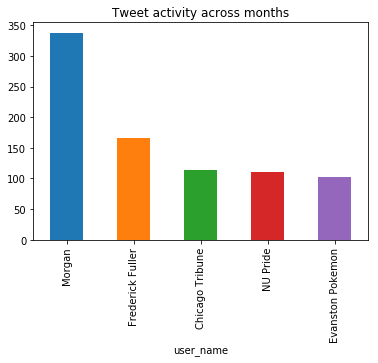

In [39]:
# Plotting the above results
df_count.\
plot(kind='bar', x='user_name', y='tweet_volume', legend=None, title="Tweet activity across months")

Based on the initial assessment, the popular accounts belong to some twitterers and few accounts are related to some activities related to the university


##### By message retweet



In [40]:
#uchicago retweeters
df_retweet_count = df_filtered.select('user_name','retweet_count_new','tweet_id','uchicago').\
filter('uchicago == 1').\
groupby('user_name').\
agg(sum('retweet_count_new').alias('total_retweet_count')).\
orderBy('total_retweet_count', ascending = False).limit(5).toPandas()

df_retweet_count

,user_name,total_retweet_count
0,.,130109
1,RR Rajbhar,60334
2,sam,45357
3,j,44955
4,Asli_Chaiwala🇮🇳,42966


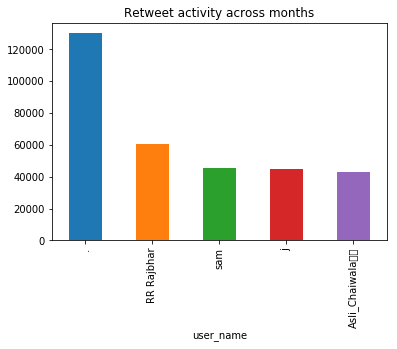

In [42]:
# Plotting the above results
df_retweet_count.\
plot(kind='bar', x='user_name', y='total_retweet_count', legend=None, title="Retweet activity across months")

In [44]:
#harvard retweeters
df_retweet_count = df_filtered.select('user_name','retweet_count_new','tweet_id','harvard').\
filter('harvard == 1').\
groupby('user_name').\
agg(sum('retweet_count_new').alias('total_retweet_count')).\
orderBy('total_retweet_count', ascending = False).limit(5).toPandas()

df_retweet_count

,user_name,total_retweet_count
0,.,19479538
1,ً,6429287
2,✨,6294164
3,♡,5853149
4,🦋,5446586


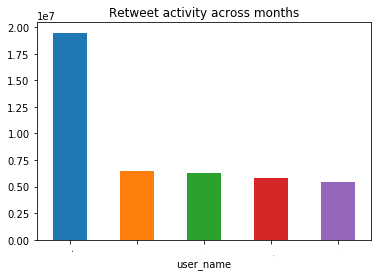

In [45]:
# Plotting the above results
df_retweet_count.\
plot(kind='bar', x='user_name', y='total_retweet_count', legend=None, title="Retweet activity across months")

In [46]:
#stanford retweeters
df_retweet_count = df_filtered.select('user_name','retweet_count_new','tweet_id','stanford').\
filter('stanford == 1').\
groupby('user_name').\
agg(sum('retweet_count_new').alias('total_retweet_count')).\
orderBy('total_retweet_count', ascending = False).limit(5).toPandas()

df_retweet_count

,user_name,total_retweet_count
0,.,223702
1,PJ,161701
2,Kay 🌎,140427
3,Sam,99646
4,Sandra,94677


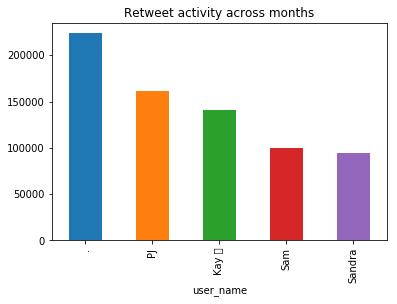

In [47]:
# Plotting the above results
df_retweet_count.\
plot(kind='bar', x='user_name', y='total_retweet_count', legend=None, title="Retweet activity across months")

In [49]:
#northwestern retweeters
df_retweet_count = df_filtered.select('user_name','retweet_count_new','tweet_id','northwesternu').\
filter('northwesternu == 1').\
groupby('user_name').\
agg(sum('retweet_count_new').alias('total_retweet_count')).\
orderBy('total_retweet_count', ascending = False).limit(5).toPandas()

df_retweet_count

,user_name,total_retweet_count
0,John,34014
1,David,23096
2,Greg,20476
3,James,16834
4,Rob,15998


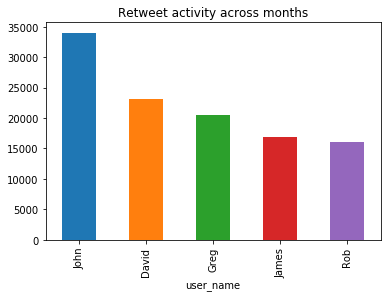

In [50]:
# Plotting the above results
df_retweet_count.\
plot(kind='bar', x='user_name', y='total_retweet_count', legend=None, title="Retweet activity across months")

##### How much are they tweeting about the Universities vs. other topics?
    We profile the user based on their tweets and retweets.
    
- Profiling based on tweet volume

In [52]:
#### Tweet profiling based on the tweet volume - Uchicago

df_count = df_filtered.select('user_name','tweet_id','uchicago','other').\
filter((col('uchicago') ==1) | (col('other')==1)).\
groupby('user_name').\
agg(sum('uchicago').alias('university_tweets'),sum('other').alias('non_university_tweets')).\
orderBy('university_tweets','non_university_tweets',ascending = False).limit(5).toPandas()

df_count

,user_name,university_tweets,non_university_tweets
0,Trucks at UChicago,586,256
1,Hailey Mitchel,367,260
2,Sofia,334,3214
3,Taaki,284,0
4,My name is ...,283,2


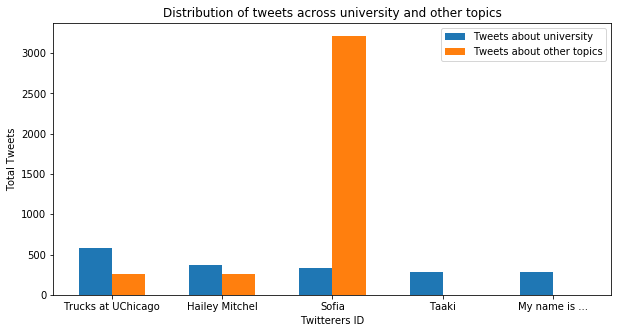

In [64]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = df_count['university_tweets'].values.tolist()
# Specify the values of orange bars (height)
orange_bar = df_count['non_university_tweets'].values.tolist()

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Tweets about university')
plt.bar(ind + width, orange_bar, width, label='Tweets about other topics')

plt.xlabel('Twitterers ID')
plt.ylabel('Total Tweets')
plt.title('Distribution of tweets across university and other topics')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, (df_count['user_name'].values.tolist()))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

The profiles associated with the universities UChicago and Harvard, namely - Trucks at UChicago and harvard-edits mostly tweet about university related topics

In [67]:
#### Tweet profiling based on the retweet volume - Harvard

df_count_harvard = df_filtered.select('user_name','tweet_id','harvard','other').\
filter((col('harvard') ==1) | (col('other')==1)).\
groupby('user_name').\
agg(sum('harvard').alias('university_tweets'),sum('other').alias('non_university_tweets')).\
orderBy('university_tweets','non_university_tweets',ascending = False).limit(5).toPandas()

df_count_harvard

,user_name,university_tweets,non_university_tweets
0,Krystal,1937,1682
1,harvard-edits,1505,2
2,정수정,1373,6
3,.,1307,133228
4,ً,1026,74430


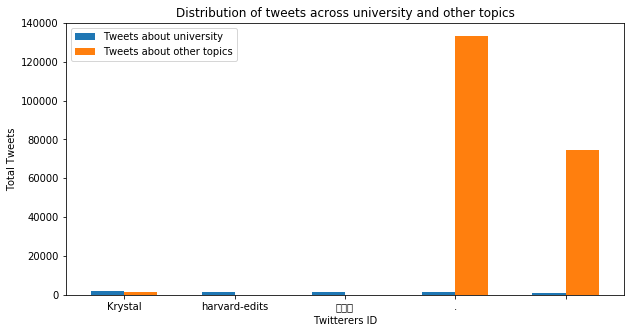

In [68]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = df_count_harvard['university_tweets'].values.tolist()
# Specify the values of orange bars (height)
orange_bar = df_count_harvard['non_university_tweets'].values.tolist()

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Tweets about university')
plt.bar(ind + width, orange_bar, width, label='Tweets about other topics')

plt.xlabel('Twitterers ID')
plt.ylabel('Total Tweets')
plt.title('Distribution of tweets across university and other topics')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, (df_count_harvard['user_name'].values.tolist()))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [69]:
#### Tweet profiling based on the retweet volume - Stanford

df_count_stanford = df_filtered.select('user_name','tweet_id','stanford','other').\
filter((col('stanford') ==1) | (col('other')==1)).\
groupby('user_name').\
agg(sum('stanford').alias('university_tweets'),sum('other').alias('non_university_tweets')).\
orderBy('university_tweets','non_university_tweets',ascending = False).limit(5).toPandas()

df_count_stanford

,user_name,university_tweets,non_university_tweets
0,Fresh Marker!,1794,0
1,Hailey Mitchel,1117,260
2,startupcrunch,1060,3771
3,Sofia,1008,3214
4,Kelly B.,964,122


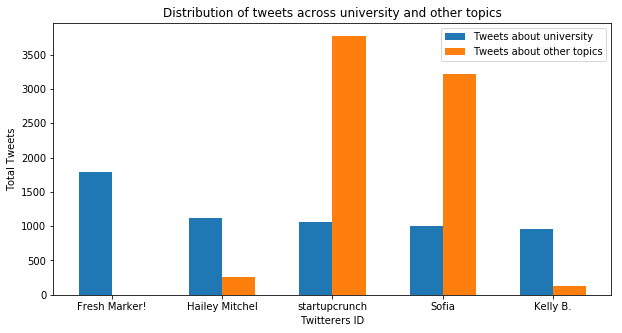

In [70]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = df_count_stanford['university_tweets'].values.tolist()
# Specify the values of orange bars (height)
orange_bar = df_count_stanford['non_university_tweets'].values.tolist()

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Tweets about university')
plt.bar(ind + width, orange_bar, width, label='Tweets about other topics')

plt.xlabel('Twitterers ID')
plt.ylabel('Total Tweets')
plt.title('Distribution of tweets across university and other topics')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, (df_count_stanford['user_name'].values.tolist()))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

Similar to UChicago's twitter activity, Stanford has a similar behavior.Additionally, certain accounts engage with both university and non-university topics

In [71]:
#### Tweet profiling based on the retweet volume - Northwestern

df_count_northwestern = df_filtered.select('user_name','tweet_id','northwesternu','other').\
filter((col('northwesternu') ==1) | (col('other')==1)).\
groupby('user_name').\
agg(sum('northwesternu').alias('university_tweets'),sum('other').alias('non_university_tweets')).\
orderBy('university_tweets','non_university_tweets',ascending = False).limit(5).toPandas()

df_count_northwestern

,user_name,university_tweets,non_university_tweets
0,Morgan,338,9699
1,Frederick Fuller,166,0
2,Chicago Tribune,114,23449
3,NU Pride,110,546
4,Evanston Pokemon,102,94


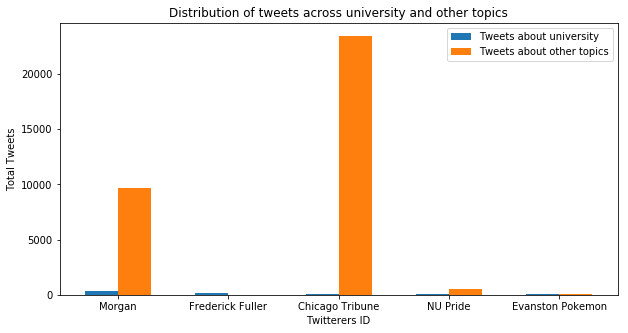

In [72]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = df_count_northwestern['university_tweets'].values.tolist()
# Specify the values of orange bars (height)
orange_bar = df_count_northwestern['non_university_tweets'].values.tolist()

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Tweets about university')
plt.bar(ind + width, orange_bar, width, label='Tweets about other topics')

plt.xlabel('Twitterers ID')
plt.ylabel('Total Tweets')
plt.title('Distribution of tweets across university and other topics')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, (df_count_northwestern['user_name'].values.tolist()))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### Where are these Twitterers located?
    - For UChicago
    - For other universities
    - Do you see any relationship between university locations and Twitterers’ locations?
    - Visualize the relationships

In [73]:
#Uchicago
df_location_uchicago = df_filtered.select('user_id','user_name','user_location','uchicago').\
filter(df_filtered.user_location.isNotNull()).\
filter(('uchicago == 1')).\
groupby('user_location').agg(count('user_id').alias('user_counts')).\
orderBy('user_counts',ascending = False).limit(5).toPandas()

df_location_uchicago

,user_location,user_counts
0,"Chicago, IL",14773
1,United States,5446
2,Chicago,5083
3,USA,2680
4,"Washington, DC",2215


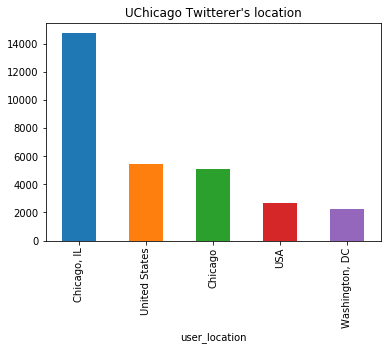

In [74]:
# Plotting the above results
df_location_uchicago.\
plot(kind='bar', x='user_location', y='user_counts', legend=None, title="UChicago Twitterer's location")

In [75]:
#Harvard
df_location_harvard = df_filtered.select('user_id','user_name','user_location','harvard').\
filter(df_filtered.user_location.isNotNull()).\
filter(('harvard == 1')).\
groupby('user_location').agg(count('user_id').alias('user_counts')).\
orderBy('user_counts',ascending = False).limit(5).toPandas()

df_location_harvard

,user_location,user_counts
0,United States,24492
1,India,13261
2,"California, USA",8610
3,"Lagos, Nigeria",8534
4,USA,8085


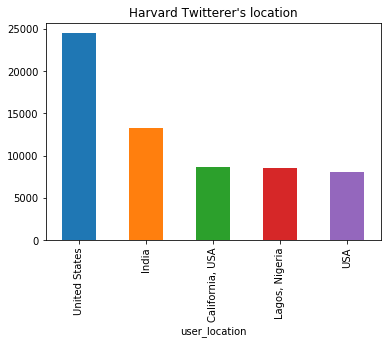

In [76]:
# Plotting the above results
df_location_harvard.\
plot(kind='bar', x='user_location', y='user_counts', legend=None, title="Harvard Twitterer's location")

In [81]:
#stanford
df_location_stanford = df_filtered.select('user_id','user_name','user_location','stanford').\
filter(df_filtered.user_location.isNotNull()).\
filter(('stanford == 1')).\
groupby('user_location').agg(count('user_id').alias('user_counts')).\
orderBy('user_counts',ascending = False).limit(5).toPandas()

df_location_stanford 

,user_location,user_counts
0,United States,10566
1,USA,6320
2,"California, USA",4675
3,India,2642
4,"Los Angeles, CA",2525


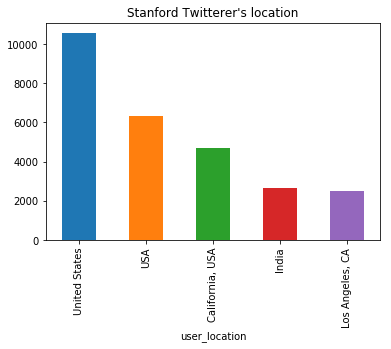

In [82]:
# Plotting the above results
df_location_stanford.\
plot(kind='bar', x='user_location', y='user_counts', legend=None, title="Stanford Twitterer's location")

In [79]:
#northwestern
df_location_northwestern = df_filtered.select('user_id','user_name','user_location','northwesternu').\
filter(df_filtered.user_location.isNotNull()).\
filter(('northwesternu == 1')).\
groupby('user_location').agg(count('user_id').alias('user_counts')).\
orderBy('user_counts',ascending = False).limit(5).toPandas()

df_location_northwestern

,user_location,user_counts
0,"Chicago, IL",4778
1,United States,2883
2,"Evanston, IL",1812
3,Chicago,1636
4,USA,1256


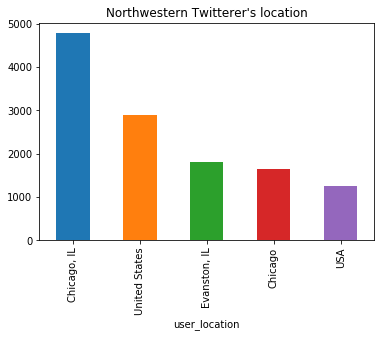

In [80]:
# Plotting the above results
df_location_northwestern.\
plot(kind='bar', x='user_location', y='user_counts', legend=None, title="Northwestern Twitterer's location")

Based on the location variable, majority share of the twitterer’s are located in the same locality as the university is located
- For UChicago, significant number of users are based in Chicago followed by Washington DC and New York
- For Harvard, significant users are based in United States, followed by India and California, USA
- For Stanford, significant users are based in United States, followed by California, USA and India
- For Northwestern, significant users are based in Chicago, IL followed by Evanston 



#### What distinguishes University of Chicago Twitterers vs Twitterers who tweet about other universities
    - Visualize the trends


Have a look at the user metrics like how famous are they, how many profiles are verified, the follower count, the retweet count of the users themselves.

In [33]:
df_filtered.select('user_id','user_name','user_verified','user_followers_count',\
                  'user_favourites_count','user_friends_count','user_protected','tweet_id').\
filter('uchicago == 1').agg(count('user_id').alias('user_counts'),sum('user_verified').alias('verified_count'),\
                           avg('user_favourites_count').alias('avg_favourite_count'),\
                           avg('user_followers_count').alias('avg_follower_count'),\
                            avg('user_friends_count').alias('avg_following_count'),\
                           count('tweet_id').alias('total_tweet_count')).show()

+-----------+--------------+-------------------+------------------+-------------------+-----------------+
|user_counts|verified_count|avg_favourite_count|avg_follower_count|avg_following_count|total_tweet_count|
+-----------+--------------+-------------------+------------------+-------------------+-----------------+
|     212695|          6788| 30817.593408401703| 14729.94892686711| 2541.1183290627423|           212695|
+-----------+--------------+-------------------+------------------+-------------------+-----------------+



In [34]:
df_filtered.select('user_id','user_name','user_verified','user_followers_count',\
                  'user_favourites_count','user_friends_count','user_protected','tweet_id').\
filter('harvard == 1').agg(count('user_id').alias('user_counts'),sum('user_verified').alias('verified_count'),\
                           avg('user_favourites_count').alias('avg_favourite_count'),\
                           avg('user_followers_count').alias('avg_follower_count'),\
                            avg('user_friends_count').alias('avg_following_count'),\
                           count('tweet_id').alias('total_tweet_count')).show()

+-----------+--------------+-------------------+------------------+-------------------+-----------------+
|user_counts|verified_count|avg_favourite_count|avg_follower_count|avg_following_count|total_tweet_count|
+-----------+--------------+-------------------+------------------+-------------------+-----------------+
|    1072966|         12184|   29413.7799399049|  8698.69609941042| 1835.7578105923208|          1072966|
+-----------+--------------+-------------------+------------------+-------------------+-----------------+



In [35]:
df_filtered.select('user_id','user_name','user_verified','user_followers_count',\
                  'user_favourites_count','user_friends_count','user_protected','tweet_id').\
filter('stanford == 1').agg(count('user_id').alias('user_counts'),sum('user_verified').alias('verified_count'),\
                           avg('user_favourites_count').alias('avg_favourite_count'),\
                           avg('user_followers_count').alias('avg_follower_count'),\
                            avg('user_friends_count').alias('avg_following_count'),\
                           count('tweet_id').alias('total_tweet_count')).show()

+-----------+--------------+-------------------+------------------+-------------------+-----------------+
|user_counts|verified_count|avg_favourite_count|avg_follower_count|avg_following_count|total_tweet_count|
+-----------+--------------+-------------------+------------------+-------------------+-----------------+
|     353920|          8216|  29703.36782323689|14216.669035375226|  3227.065449819168|           353920|
+-----------+--------------+-------------------+------------------+-------------------+-----------------+



In [36]:
df_filtered.select('user_id','user_name','user_verified','user_followers_count',\
                  'user_favourites_count','user_friends_count','user_protected','tweet_id').\
filter('northwesternu == 1').agg(count('user_id').alias('user_counts'),sum('user_verified').alias('verified_count'),\
                           avg('user_favourites_count').alias('avg_favourite_count'),\
                           avg('user_followers_count').alias('avg_follower_count'),\
                            avg('user_friends_count').alias('avg_following_count'),\
                           count('tweet_id').alias('total_tweet_count')).show()

+-----------+--------------+-------------------+------------------+-------------------+-----------------+
|user_counts|verified_count|avg_favourite_count|avg_follower_count|avg_following_count|total_tweet_count|
+-----------+--------------+-------------------+------------------+-------------------+-----------------+
|      89602|          3420|  30849.81299524564|16099.071304211959| 2341.8677038458964|            89602|
+-----------+--------------+-------------------+------------------+-------------------+-----------------+



- Harvard has significantly higher number of twitterer’s followed by UChicago, Stanford and Northwestern
- UChicago has a higher twitter engagement, followed by Northwestern, Stanford and Harvard 
- A similar trend is seen across the avg no. of follower’s associated with Northwestern university twitterers, followed by UChicago, Stanford and Harvard
- The twitter activity reinforces the popularity of the universities. Harvard being one of the most popular universities in the world


#### What are the timelines of these tweets? Do you see significant peaks and valleys?


##### timeline by month - Uchicago

In [15]:
month_df = df_filtered.select('tweet_id','month').\
filter('uchicago == 1').groupby('month').agg(count('tweet_id').alias('tweet_count')).\
orderBy('month',ascending = True).toPandas()

In [16]:
month_df

,month,tweet_count
0,1,9851
1,2,20118
2,3,20831
3,4,13024
4,5,13888
5,6,31334
6,7,16720
7,8,16134
8,9,18483
9,10,19617


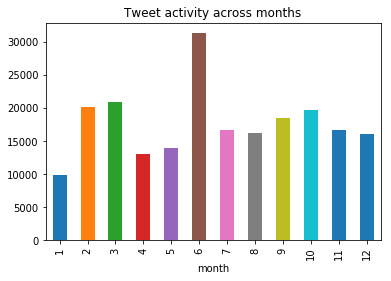

In [19]:
# Plotting the above results
month_df.\
plot(kind='bar', x='month', y='tweet_count', legend=None, title="Tweet activity across months")


##### time by day

In [20]:
day_df = df_filtered.select('tweet_id','day').\
filter('uchicago == 1').groupby('day').agg(count('tweet_id').alias('tweet_count')).\
orderBy('day',ascending = True).toPandas()

In [21]:
day_df

,day,tweet_count
0,1,6043
1,2,5105
2,3,6220
3,4,5608
4,5,5974
5,6,4711
6,7,4292
7,8,4999
8,9,7564
9,10,7533


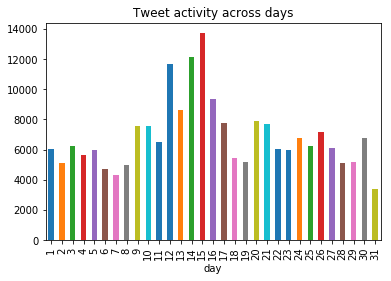

In [22]:
# Plotting the above results
day_df.\
plot(kind='bar', x='day', y='tweet_count', legend=None, title="Tweet activity across days")

##### hour of the day

In [23]:
hour_df = df_filtered.select('tweet_id','time_of_day').\
filter('uchicago == 1').groupby('time_of_day').agg(count('tweet_id').alias('tweet_count')).\
orderBy('time_of_day', ascending = True).toPandas()

In [24]:
hour_df

,time_of_day,tweet_count
0,0,5689
1,1,5002
2,2,4447
3,3,3662
4,4,3678
5,5,4747
6,6,6322
7,7,8929
8,8,10552
9,9,11613


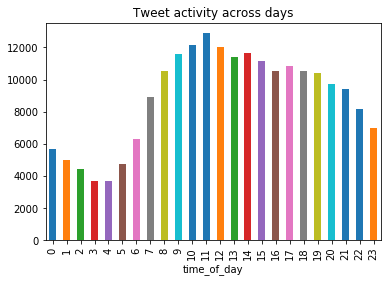

In [25]:
# Plotting the above results
hour_df.\
plot(kind='bar', x='time_of_day', y='tweet_count', legend=None, title="Tweet activity across days")

- For UChicago, Twitter activity is on the rise as the month progresses. January has the least twitter activity and June has the highest twitter activity
- For any given month, the twitter activity is a bit low in the beginning and the end compared to other days
- For any given day, the twitter activity seem to be on the rise as the day progresses. Maximum twitter activity is observed in the noon


##### timeline by month - Harvard

In [40]:
month_df = df_filtered.select('tweet_id','month').\
filter('harvard == 1').groupby('month').agg(count('tweet_id').alias('tweet_count')).\
orderBy('month',ascending = True).toPandas()

month_df

,month,tweet_count
0,1,84572
1,2,135653
2,3,120663
3,4,126396
4,5,60972
5,6,52141
6,7,66877
7,8,82261
8,9,62090
9,10,149000


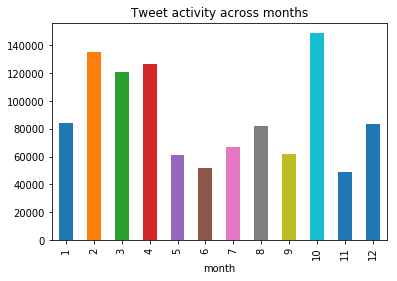

In [28]:
# Plotting the above results
month_df.\
plot(kind='bar', x='month', y='tweet_count', legend=None, title="Tweet activity across months")

#### time by day


In [41]:
day_df = df_filtered.select('tweet_id','day').\
filter('harvard == 1').groupby('day').agg(count('tweet_id').alias('tweet_count')).\
orderBy('day',ascending = True).toPandas()

day_df

,day,tweet_count
0,1,38167
1,2,29874
2,3,26952
3,4,27394
4,5,23685
5,6,19062
6,7,15698
7,8,17473
8,9,23142
9,10,17941


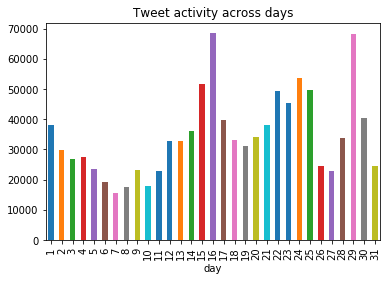

In [30]:
# Plotting the above results
day_df.\
plot(kind='bar', x='day', y='tweet_count', legend=None, title="Tweet activity across days")

#### hour of the day

In [42]:
hour_df = df_filtered.select('tweet_id','time_of_day').\
filter('harvard == 1').groupby('time_of_day').agg(count('tweet_id').alias('tweet_count')).\
orderBy('time_of_day', ascending = True).toPandas()

hour_df

,time_of_day,tweet_count
0,0,38497
1,1,34866
2,2,33340
3,3,29581
4,4,29447
5,5,33427
6,6,39673
7,7,46566
8,8,51315
9,9,55195


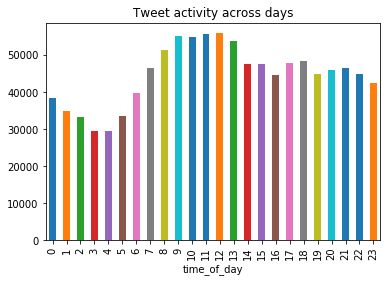

In [31]:
# Plotting the above results
hour_df.\
plot(kind='bar', x='time_of_day', y='tweet_count', legend=None, title="Tweet activity across days")

Twitter activity associated with Harvard is as follows:
- Twitter activity decreases as the month progress and there’s increased activity in the month of October. October has the largest twitter activity and November has the least twitter activity
- For any given month, the twitter activity is a bit low in the beginning and the end compared to other days
- For any given day, the twitter activity seem to be on the rise as the day progresses. Maximum twitter activity is observed in the noon and the same trend is maintained through out the day


#### timeline by month - Stanford

In [43]:
month_df = df_filtered.select('tweet_id','month').\
filter('stanford == 1').groupby('month').agg(count('tweet_id').alias('tweet_count')).\
orderBy('month',ascending = True).toPandas()

month_df

,month,tweet_count
0,1,20853
1,2,19357
2,3,32388
3,4,18101
4,5,31274
5,6,37231
6,7,28978
7,8,32127
8,9,27212
9,10,47451


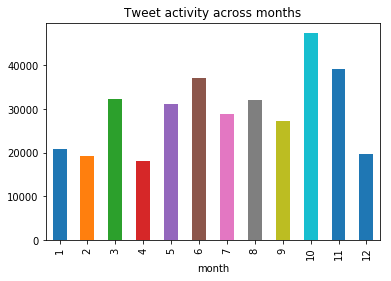

In [32]:
# Plotting the above results
month_df.\
plot(kind='bar', x='month', y='tweet_count', legend=None, title="Tweet activity across months")

#### timeline by day

In [44]:
day_df = df_filtered.select('tweet_id','day').\
filter('stanford == 1').groupby('day').agg(count('tweet_id').alias('tweet_count')).\
orderBy('day',ascending = True).toPandas()

day_df

,day,tweet_count
0,1,16856
1,2,16117
2,3,13049
3,4,19240
4,5,12704
5,6,10474
6,7,10858
7,8,9859
8,9,8758
9,10,7872


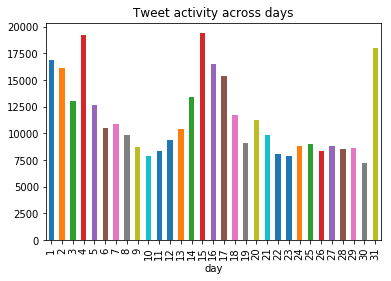

In [38]:
# Plotting the above results
day_df.\
plot(kind='bar', x='day', y='tweet_count', legend=None, title="Tweet activity across days")

#### hour of the day

In [45]:
hour_df = df_filtered.select('tweet_id','time_of_day').\
filter('stanford == 1').groupby('time_of_day').agg(count('tweet_id').alias('tweet_count')).\
orderBy('time_of_day', ascending = True).toPandas()

hour_df

,time_of_day,tweet_count
0,0,11503
1,1,10411
2,2,10002
3,3,9195
4,4,9225
5,5,11132
6,6,12740
7,7,15603
8,8,17784
9,9,18488


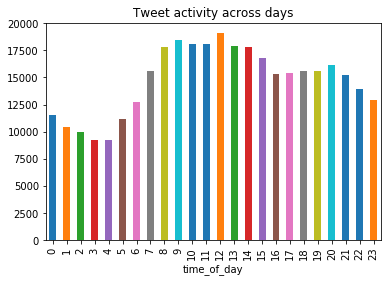

In [37]:
# Plotting the above results
hour_df.\
plot(kind='bar', x='time_of_day', y='tweet_count', legend=None, title="Tweet activity across days")

#### timeline by month - northwestern

In [46]:
month_df = df_filtered.select('tweet_id','month').\
filter('northwesternu == 1').groupby('month').agg(count('tweet_id').alias('tweet_count')).\
orderBy('month',ascending = True).toPandas()

month_df

,month,tweet_count
0,1,4453
1,2,5694
2,3,13766
3,4,3449
4,5,12915
5,6,5295
6,7,4236
7,8,5186
8,9,5794
9,10,8645


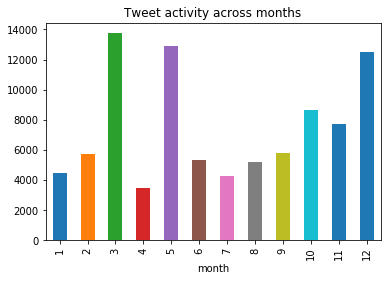

In [39]:
# Plotting the above results
month_df.\
plot(kind='bar', x='month', y='tweet_count', legend=None, title="Tweet activity across months")

#### timeline by day

In [47]:
day_df = df_filtered.select('tweet_id','day').\
filter('northwesternu == 1').groupby('day').agg(count('tweet_id').alias('tweet_count')).\
orderBy('day',ascending = True).toPandas()

day_df

,day,tweet_count
0,1,2892
1,2,2269
2,3,2200
3,4,2150
4,5,2020
5,6,2512
6,7,2049
7,8,2130
8,9,1932
9,10,2584


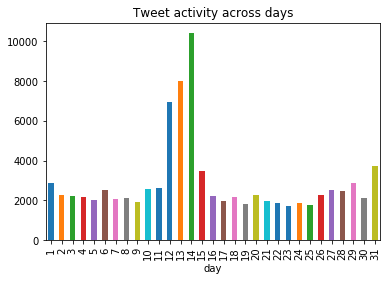

In [35]:
# Plotting the above results
day_df.\
plot(kind='bar', x='day', y='tweet_count', legend=None, title="Tweet activity across days")

#### hour of the day

In [48]:
hour_df = df_filtered.select('tweet_id','time_of_day').\
filter('northwesternu == 1').groupby('time_of_day').agg(count('tweet_id').alias('tweet_count')).\
orderBy('time_of_day', ascending = True).toPandas()

hour_df

,time_of_day,tweet_count
0,0,2142
1,1,1602
2,2,1394
3,3,1191
4,4,1390
5,5,1561
6,6,2483
7,7,2930
8,8,3700
9,9,4297


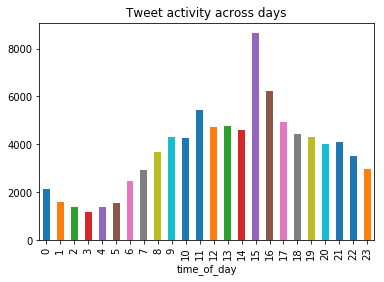

In [36]:
# Plotting the above results
hour_df.\
plot(kind='bar', x='time_of_day', y='tweet_count', legend=None, title="Tweet activity across days")

Twitter activity associated with Northwestern is as follows:
- There isn’t a definite pattern in the twitter activity. March and May months has the highest twitter activity and April has the least twitter activity
- For any given month, the twitter activity is a bit low in the beginning and the end compared to other days with maximum activity in the middle of the month
- For any given day, the twitter activity seem to be on the rise as the day progresses. Maximum twitter activity is observed in the noon and the same trend is maintained through out the day


##### Using Jaccard distance - Uchicago

In [26]:
import pandas as pd
import numpy as np
#pd.set_option('display.max_colwidth', None)
#pd.reset_option('display.max_rows')
from itertools import compress 
from pyspark.sql.functions import *
from pyspark.sql.types import *
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')
import re
from pyspark.ml.feature import MinHashLSH
from pyspark.ml.feature import CountVectorizer,  IDF, CountVectorizerModel, Tokenizer, RegexTokenizer, StopWordsRemover
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import Row
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bharadwajk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
df_filtered = df_concat

In [44]:
raw_tweets = df_filtered.select("text")
raw_tweets.show(5)

+--------------------+
|                text|
+--------------------+
|rt @historyinmome...|
|i'm at @harvard u...|
|rt @upfrontafrica...|
|rt @historyinmome...|
|rt @historyinmome...|
+--------------------+
only showing top 5 rows



#### Run similarity analysis on the “title” variable  
 - You can use either Jaccard or SimHash (or both to compare the results)  
 - Explain how you selected a similarity threshold for “near-duplicate”  
 - Build a bar-chart visualization for two variables (count of unique and count of “near-duplicate”)  
 - Build a histogram showing the overall distribution of “near-duplication”  

In [45]:
text = raw_tweets.rdd.map(lambda x : x['text']).filter(lambda x: x is not None)

StopWords = stopwords.words("english")

tokens = text\
    .map( lambda document: document.strip().lower())\
    .map( lambda document: re.split(" ", document))\
    .map( lambda word: [x for x in word if len(x) > 1] )\
    .zipWithIndex()

In [46]:
row = Row('text')
df_text = text.map(row).zipWithIndex().toDF(['text','id'])
df_text.show(5,truncate = False)

+----------------------------------------------------------------------------------------------------------------------------------------------+---+
|text                                                                                                                                          |id |
+----------------------------------------------------------------------------------------------------------------------------------------------+---+
|[attending trip to yerkes observatory at yerkes observatory - university of chicago https://t.co/i2plbtjldu]                                  |0  |
|[university of chicago dean to freshmen: students and staff are free to debate 'without fear of being silenced'  https://t.co/76pnu8a0bs]     |1  |
|[rt @syqau: university of chicago again denies students safe spaces and protection from triggering https://t.co/9hl1ai9g84]                   |2  |
|[rt @eyh_chicago: ends tomorrow! we invite all girls in 6-8 grades to register for #eyhchi18 on 24th marc

In [47]:
df_text.count()

10000

In [48]:
df_tokens = spark.createDataFrame(tokens, ["list_of_words",'id'])

#Drop records with no tokens
df_tokens = df_tokens.where(col('list_of_words').getItem(0).isNotNull())
df_tokens.limit(5).toPandas()

,list_of_words,id
0,"[rt, @ierenergy:, recent, study, from, the, university, of, chicago, showed, that, consumers, ha...",0
1,"[has, anyone, heard, of, mathematician, r., w., barnard?, he, was, professor, at, the, universit...",1
2,"[rt, @billbrowder:, very, honored, and, proud, to, receive, the, university, of, chicago, 2019, ...",2
3,"[@toyarochelle, dr., catherine, hearth, w/, university, of, chicago, women’s, center, in, the, s...",3
4,"[@backupsas, @itsadult, @ukadultnetwork, @_charlie_rose, google, suggests, that, it’s, platform,...",4


#### Countvectorize to create features

In [49]:
vectorize = CountVectorizer(inputCol="list_of_words", outputCol="features", minDF=1.0)
df_vectorize = vectorize.fit(df_tokens).transform(df_tokens)

In [50]:
df_vectorize.limit(5).toPandas()

,list_of_words,id,features
0,"[rt, @justinwolfers:, the, university, of, chicago, surveyed, 42, leading, economists, and, foun...",0,"(1.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[rt, @uchicagoalumni:, mt, @punkcharming80s:, #uchiaw, arts, panel, at, university, of, chicago,...",1,"(1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[rt, @justinwolfers:, the, university, of, chicago, surveyed, 42, leading, economists, and, foun...",2,"(1.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[rt, @uchicagoalumni:, mt, @punkcharming80s:, #uchiaw, arts, panel, at, university, of, chicago,...",3,"(1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[rt, @justinwolfers:, the, university, of, chicago, surveyed, 42, leading, economists, and, foun...",4,"(1.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


    Fitting MinHashLSH to create hash table

In [51]:
mh = MinHashLSH(inputCol="features", outputCol="hashes", numHashTables=5)
model = mh.fit(df_vectorize)
df_hashed = mh.fit(df_vectorize).transform(df_vectorize).cache()

In [52]:
df_hashed_text = df_text.join(df_hashed, "id", how = 'left').cache()
df_hashed_text.show(5)

+----+--------------------+--------------------+--------------------+--------------------+
|  id|                text|       list_of_words|            features|              hashes|
+----+--------------------+--------------------+--------------------+--------------------+
|  26|[rt @teliovcroby:...|[@keoshen, maybe,...|(19079,[0,1,2,4,5...|[[1.5255692E8], [...|
|  29|[i am blessed to ...|[@trackcitychick,...|(19079,[0,1,2,4,5...|[[1.5255692E8], [...|
| 474|[data science int...|[rt, @ilcharters:...|(19079,[0,1,2,3,4...|[[1.5255692E8], [...|
| 964|[the university o...|[rt, @linguistlis...|(19079,[0,1,2,3,4...|[[1.08816661E8], ...|
|1677|[rt @destiny3650:...|[rt, @aliasvaughn...|(19079,[0,2,3,4,9...|[[1.20771342E8], ...|
+----+--------------------+--------------------+--------------------+--------------------+
only showing top 5 rows



Evaluating similarity across three levels of similarities, low, medium and high Jaccard distances

In [53]:
jaccard_distance = 0.3

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'),
#             col('datasetA.list_of_words').alias('words_A'),
#             col('datasetB.list_of_words').alias('words_B')
            )

In [54]:
df_dups_30 = df_dups_text
df_dups_text.cache()
df_dups_text.limit(5).toPandas()

,distCol,id_A,id_B,text_A,text_B
0,0.00,7732,7739,"(@unknownpenguin @rjritzel ""garvey describes catholic university of america much like the univer...",(rt @concorserica: university of chicago emergency medicine intern class: because diversity isn’...
1,0.00,8179,8198,(rt @sofiaorden: linguistics (audio) - the university of chicago | linguistics... #linguistics h...,(rt @mandophotos: the outside of the university of chicago medicine's comer children's hospital ...
2,0.25,9584,9612,(rt @mindshiftkqed: university of chicago consortium scholars were stunned to discover that pass...,(rt @silentmoviegifs: sessue hayakawa originally came to america to study political economics at...
3,0.00,4997,5014,"(rt @lionsroar: matthew kapstein, buddhist studies professor at the university of chicago, joins...",(rt @jonathansmucker: “these weren’t photo ops. bernie literally helped to lead the first sit-in...
4,0.00,5384,5448,"(""...being a black student [at university of chicago in the late 60s] definitely had political i...","(cute flapper girl's...university of chicago, 1920's https://t.co/dwi9dh4vwo,)"


In [55]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.3 } jaccard distance:  6202
Unique titles based on { 0.3 } jaccard distance:  0.3 :  3798


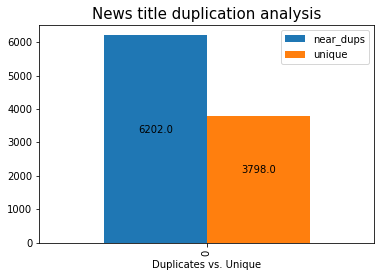

In [56]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'],
                align='center', width=0.8)
plt.xlabel("Duplicates vs. Unique")
ax.set_title('News title duplication analysis', fontsize=15)
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 
        
        
        

Medium jaccard distance


In [57]:
jaccard_distance = 0.5

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'),
#             col('datasetA.list_of_words').alias('words_A'),
#             col('datasetB.list_of_words').alias('words_B')
            )    

In [58]:
df_dups_50 = df_dups_text
df_dups_text.cache()
df_dups_text.limit(5).toPandas()

,distCol,id_A,id_B,text_A,text_B
0,0.0,7970,8373,(rt @spectatorindex: nobel laureates.\n\nharvard: 158\ncambridge: 118\nuniversity of california:...,(rt @chuckmodi1: university of chicago dropping sat is huge win against classism. then this!:\n\...
1,0.0,7970,7974,(rt @spectatorindex: nobel laureates.\n\nharvard: 158\ncambridge: 118\nuniversity of california:...,(rt @spectatorindex: nobel laureates.\n\nharvard: 158\ncambridge: 118\nuniversity of california:...
2,0.0,5377,5433,(rt @spectatorindex: nobel laureates.\n\nharvard: 158\ncambridge: 118\nuniversity of california:...,(rt @toadmeister: this is a scandalous story. academic is harassed by two university of chicago ...
3,0.0,5415,5462,"(rt @skpachauri101: this simple man is prof hussain abdul sattar,\n\nchief professor - pathology...","(rt @fleejack: #diversity #jobs \nuniversity of chicago lab schools director of diversity, equit..."
4,0.0,5366,5423,(rt @spectatorindex: nobel laureates.\n\nharvard: 158\ncambridge: 118\nuniversity of california:...,(rt @saaorg: now hiring: assistant professor in environmental archaeology | university of chicag...


In [59]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.5 } jaccard distance:  6529
Unique titles based on { 0.5 } jaccard distance:  0.5 :  3471


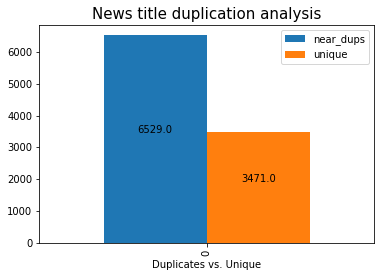

In [60]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'], align='center', width=0.8)
plt.xlabel("Duplicates vs. Unique")
ax.set_title('News title duplication analysis', fontsize=15)
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

#### High jaccard distance

In [61]:
jaccard_distance = 0.7

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'),
#             col('datasetA.list_of_words').alias('words_A'),
#             col('datasetB.list_of_words').alias('words_B')
            )    

In [62]:

df_dups_70 = df_dups_text
df_dups_text.cache()
df_dups_text.limit(5).toPandas()

,distCol,id_A,id_B,text_A,text_B
0,0.000000,7520,7525,(rt @merenbey: some of the material we have developed to teach microbial 'omics at the universit...,(rt @merenbey: some of the material we have developed to teach microbial 'omics at the universit...
1,0.000000,566,1362,"(rt @bestcolleges_: university of chicago 🌇🍂\n\nchicago, il https://t.co/qqccjsotwx,)",(rt @spectatorindex: nobel laureates.\n\nharvard: 158\ncambridge: 118\nuniversity of california:...
2,0.000000,6497,6513,(obama taught constitutional law at the university of chicago law school from 1992 to 2004. prio...,(university of chicago booth school of business develops new way of calculating hospital overall...
3,0.000000,8636,8669,"(rt @mwcsports: mwc football offensive performer of the week - vittorio tricase, university of c...",(rt @chuckmodi1: university of chicago dropping sat is huge win against classism. then this!:\n\...
4,0.666667,8668,8669,(rt @chuckmodi1: university of chicago dropping sat is huge win against classism. then this!:\n\...,(rt @chuckmodi1: university of chicago dropping sat is huge win against classism. then this!:\n\...


In [63]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.7 } jaccard distance:  8725
Unique titles based on { 0.7 } jaccard distance:  0.7 :  1275


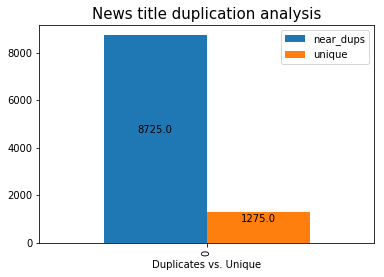

In [64]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'], align='center', width=0.8)
plt.xlabel("Duplicates vs. Unique")
ax.set_title('News title duplication analysis', fontsize=15)
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

In [65]:
df_dups_30_id = df_dups_30.select(col('id_A').alias('id_30_A'), col('id_B').alias('id_30_B'))
df_dups_50_id = df_dups_50.select(col('id_A').alias('id_50_A'), col('id_B').alias('id_50_B'))
df_dups_70_id = df_dups_70.select(col('text_A'), col('text_B'),\
                                  col('id_A').alias('id_70_A'), col('id_B').alias('id_70_B'))

print(df_dups_30_id.count())
print(df_dups_50_id.count())
print(df_dups_70_id.count())

184299
199530
426767


In [66]:
dups_combined = df_dups_70_id.join(df_dups_50_id, on=((df_dups_70_id.id_70_A == df_dups_50_id.id_50_A) & (df_dups_70_id.id_70_B == df_dups_50_id.id_50_B)), how="left_outer")\
.join(df_dups_30_id, on=((df_dups_70_id.id_70_A == df_dups_30_id.id_30_A) & (df_dups_70_id.id_70_B == df_dups_30_id.id_30_B)), how="left_outer")

dups_combined.limit(5).toPandas()

,text_A,text_B,id_70_A,id_70_B,id_50_A,id_50_B,id_30_A,id_30_B
0,"(#law school lectures (audio) - the university of chicago law... #law https://t.co/l7izjjnsod,)",(rt @anthonyocampo: the university of chicago—whose endowment is $8.5 billion—won’t be paying th...,706,2695,706.0,2695.0,706.0,2695.0
1,"(rt @kimkbaltimore: with all due respect, anyone can be a professor at the university of chicago...","(rt @brithume: three cheers, maybe four, for the university of chicago. https://t.co/onoeo6syej,)",1116,6439,NaN,NaN,NaN,NaN
2,(rt @cristianafarias: university of chicago law professor wipes out his twitter account after ge...,"(the university of chicago grad student union demands recognition, even without government certi...",3190,5653,3190.0,5653.0,3190.0,5653.0
3,(@rasmansa @epoe187 it's allan bloom of the university of chicago. his book has an introduction ...,(rt @rezaaslan: 37 of 38 economists polled by university of chicago study said the below is tota...,3628,6857,NaN,NaN,NaN,NaN
4,(rt @dkulchar: richard spencer has an ma from the university of chicago and studied at duke. htt...,(rt @workersworld: university of chicago graduate workers win historic union vote https://t.co/q...,5495,8953,5495.0,8953.0,5495.0,8953.0


#### Creating a duplicate vs non-duplicate flag for each similarity

In [67]:
dups_combined = dups_combined.\
withColumn("threshold_30",\
           when(col("id_30_A").isNotNull(), "Duplicate").
           otherwise("Non-Dup")).\
withColumn("threshold_50",\
           when(col("id_50_A").isNotNull(), "Duplicate").
           otherwise("Non-Dup")).\
withColumn("threshold_70",\
           when(col("id_70_A").isNotNull(), "Duplicate").
           otherwise("Non-Dup")).\
drop("id_30_A", "id_30_B", "id_50_A", "id_50_B", "id_70_A", "id_70_B")

dups_combined.limit(5).toPandas()

,text_A,text_B,threshold_30,threshold_50,threshold_70
0,(rt @sofiaorden: arabic circle - the university of chicago | middle eastern... #middleeasternstu...,(rt @spectatorindex: nobel laureates.\n\nharvard: 158\ncambridge: 118\nuniversity of california:...,Non-Dup,Non-Dup,Duplicate
1,(rt @sofiaorden: arabic circle - the university of chicago | middle eastern... #middleeasternstu...,"(rt @nt4ox: asst prof in new testament &amp; early christian literature, university of chicago. ...",Non-Dup,Non-Dup,Duplicate
2,(rt @sofiaorden: arabic circle - the university of chicago | middle eastern... #middleeasternstu...,(rt @chuckmodi1: university of chicago dropping sat is huge win against classism. then this!:\n\...,Non-Dup,Non-Dup,Duplicate
3,(rt @sofiaorden: arabic circle - the university of chicago | middle eastern... #middleeasternstu...,(rt @justinwolfers: the university of chicago surveyed 42 leading economists and found exactly o...,Non-Dup,Non-Dup,Duplicate
4,(rt @sofiaorden: arabic circle - the university of chicago | middle eastern... #middleeasternstu...,(rt @canarymission: diana lozano smeared israel at divestment rally 1st day of classes at the un...,Duplicate,Duplicate,Duplicate


##### Select a sample of records across 3 thresholds (jaccard similarities):
* Records that are marked as duplicate by all three thresholds (meet the level of **threshold_30**)
* Records that are identified as non-duplicate by **threshold_30**, while being marked as dups by both **threshold_50** and **threshold_70**
* Records that are identified as non-duplicate by both **threshold_30** and **threshold_50**, while being marked as dups by **threshold_70**

In [68]:
dups_combined_sample = \
dups_combined.filter(("threshold_30 == 'Duplicate'")).sample(False, 0.1, 12345).limit(10).\
union\
(dups_combined.filter(("threshold_30 == 'Non-Dup' and threshold_50 == 'Duplicate'")).sample(False, 0.1, 12345).limit(10)).\
union\
(dups_combined.filter(("threshold_50 == 'Non-Dup'")).sample(False, 0.1, 12345).limit(10)).\
orderBy('threshold_30', 'threshold_50', 'threshold_70')

In [69]:
pd.set_option('display.max_rows', 30)
dups_combined_sample.limit(30).toPandas()

,text_A,text_B,threshold_30,threshold_50,threshold_70
0,"(law school lectures (audio) - the university of chicago law... https://t.co/ccgb3vqvrc,)",(rt @anthonyocampo: the university of chicago—whose endowment is $8.5 billion—won’t be paying th...,Duplicate,Duplicate,Duplicate
1,(rt @brentnyt: university of chicago economics study shows hannity's misinformation on covid-19 ...,"(rt @archaeologyart: statue of horus at edfu, lost egypt photographic catalog, the oriental inst...",Duplicate,Duplicate,Duplicate
2,(rt @arabmuia: this professor was grading tests next to me on the whole flight to fl. if there’s...,(rt @sofiaorden: computer science (video) - the university of chicago | computer... #computersci...,Duplicate,Duplicate,Duplicate
3,(rt @avermeule: this is supposed to be millennial humor. to me it sounds like ordinary lunchtime...,(rt @shababylovesyou: 69 days until ya girl is a harvard graduate. 🎉 3 degrees gone look good on...,Duplicate,Duplicate,Duplicate
4,(@boaby_wan @bohrcpng @emeline_merrill @msmithbubbles well im a phd in economics from the univer...,(rt @123rhgreen: wtf ??\n\nstudent activists pledge to occupy university of chicago provost’s ho...,Duplicate,Duplicate,Duplicate
5,(rt @arabmuia: this professor was grading tests next to me on the whole flight to fl. if there’s...,(university of chicago administration : defend uchicago’s international students - sign the peti...,Duplicate,Duplicate,Duplicate
6,(rt @arabmuia: this professor was grading tests next to me on the whole flight to fl. if there’s...,"(rt @legalhistory: baude on constitutional liquidation: william baude, university of chicago law...",Duplicate,Duplicate,Duplicate
7,(rt @arabmuia: this professor was grading tests next to me on the whole flight to fl. if there’s...,(michigan's original thanksgiving week rivalry pitted the wolverines against the university of c...,Duplicate,Duplicate,Duplicate
8,(rt @arabmuia: this professor was grading tests next to me on the whole flight to fl. if there’s...,(rt @kena1019: i’m incredibly grateful and humbled that the university of chicago’s @harrispolic...,Duplicate,Duplicate,Duplicate
9,"(rt @ffreethinkers: ""a university of chicago study showed that children raised in secular househ...",(rt @chicagotribune: the chicago tribune is partnering with the university of chicago to answer ...,Duplicate,Duplicate,Duplicate


We can see some sample titles which are **marked as duplicate or non-duplicate by all the thresholds**.

The **first 10** titles, which are marked as "**duplicate**" by all the thresholds, they seem pretty similar. So **all** Jaccard distance thresholds of **0.3,0.5,0.7** seem to do **good work** for these titles.

These are followed by the **next 10** titles (**index 10 to 19**), we can observe that they are marked as "**non-duplicate**" for **0.3** threshold, but are marked "**duplicate**" for **0.5** and **0.7** thresholds. On further observation we can see that the titles have been incorrectly classified as duplicate for both **0.5 and 0.7 thresholds** 

For **last 10** titles (**index 20 to 29**), we see that they are marked as "**non-duplicate**" by the **0.3** threshold and **0.5** thresholds, but are classified as "**duplicate**" by **0.7** threshold. On further observation of the titles we can see that most of the titles are **non-duplicates**. So, the thresholds **0.3** and **0.5** correctly classify the records as non-duplicates.

Jaccard distance of **0.3** does a very good job for classifiying near-similar duplicates.

#### Jaccard distance - Harvard


In [74]:
raw_tweets = df_filtered.select('text',).filter('harvard == 1').limit(10000)
raw_tweets.show(5)

+--------------------+
|                text|
+--------------------+
|rt @historyinmome...|
|i'm at @harvard u...|
|rt @upfrontafrica...|
|rt @historyinmome...|
|rt @historyinmome...|
+--------------------+
only showing top 5 rows



#### Run similarity analysis on the “title” variable  
 - You can use either Jaccard or SimHash (or both to compare the results)  
 - Explain how you selected a similarity threshold for “near-duplicate”  
 - Build a bar-chart visualization for two variables (count of unique and count of “near-duplicate”)  
 - Build a histogram showing the overall distribution of “near-duplication”  

In [75]:
text = raw_tweets.rdd.map(lambda x : x['text']).filter(lambda x: x is not None)

StopWords = stopwords.words("english")

tokens = text\
    .map( lambda document: document.strip().lower())\
    .map( lambda document: re.split(" ", document))\
    .map( lambda word: [x for x in word if len(x) > 1] )\
    .zipWithIndex()

In [76]:
row = Row('text')
df_text = text.map(row).zipWithIndex().toDF(['text','id'])
df_text.show(5,truncate = False)

+-----------------------------------------------------------------------------------------------------------------------------+---+
|text                                                                                                                         |id |
+-----------------------------------------------------------------------------------------------------------------------------+---+
|[rt @techinsider: harvard university is creating robotic insects to monitor the environment https://t.co/zzt0z7iihw]         |0  |
|[has a bear keychain with harvard university written on it]                                                                  |1  |
|[let me be the student of harvard university 👨🏻‍🎓~
~
~
 #emo #emoboy #emokid #estetic #boy #boys… https://t.co/wy97xrlcjl]|2  |
|[#trapadrive went to harvard university bruh! https://t.co/8vk1ddjsac]                                                       |3  |
|[currently standing around many harvard university police near the joy st. ent

In [77]:
df_text.count()

10000

In [78]:
df_tokens = spark.createDataFrame(tokens, ["list_of_words",'id'])

#Drop records with no tokens
df_tokens = df_tokens.where(col('list_of_words').getItem(0).isNotNull())
df_tokens.limit(5).toPandas()

,list_of_words,id
0,"[rt, @factsinyourface:, in, 1985,, there, was,...",0
1,"[rt, @fact:, in, 1985,, there, was, condom, de...",1
2,"[rt, @factsinyourface:, in, 1985,, there, was,...",2
3,"[rt, @fact:, in, 1985,, there, was, condom, de...",3
4,"[rt, @fact:, in, 1985,, there, was, condom, de...",4


#### Countvectorize to create features

In [79]:
vectorize = CountVectorizer(inputCol="list_of_words", outputCol="features", minDF=1.0)
df_vectorize = vectorize.fit(df_tokens).transform(df_tokens)

In [80]:
df_vectorize.limit(5).toPandas()

,list_of_words,id,features
0,"[muy, buena, oportunidad!, the, srivastava, la...",0,"(1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
1,"[startup, sana, biotechnology, licenses, cell,...",1,"(1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[rt, @redbionova:, muy, buena, oportunidad!, t...",2,"(1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3,"[rt, @redbionova:, muy, buena, oportunidad!, t...",3,"(1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
4,"[rt, @bizzoly:, honored, and, grateful, to, be...",4,"(1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, ..."


    Fitting MinHashLSH to create hash table

In [81]:
mh = MinHashLSH(inputCol="features", outputCol="hashes", numHashTables=5)
model = mh.fit(df_vectorize)
df_hashed = mh.fit(df_vectorize).transform(df_vectorize).cache()

In [82]:
df_hashed_text = df_text.join(df_hashed, "id", how = 'left').cache()
df_hashed_text.show(5)

+----+--------------------+--------------------+--------------------+--------------------+
|  id|                text|       list_of_words|            features|              hashes|
+----+--------------------+--------------------+--------------------+--------------------+
|  26|[rt @milesgeorge8...|[rt, @blampsbybou...|(10169,[0,1,32,50...|[[5.4183431E7], [...|
|  29|[rt @tomjoynerfou...|[rt, @adavisthego...|(10169,[0,1,32,50...|[[5.4183431E7], [...|
| 474|[scottish teenage...|[rt, @esotericexp...|(10169,[0,1,2,4,2...|[[2.2095873E8], [...|
| 964|[rt @timmythick: ...|[rt, @nbcnews:, n...|(10169,[0,1,3,7,6...|[[2674648.0], [7....|
|1677|[rt @kaepernick7:...|[rt, @tambayobens...|(10169,[0,1,2,3,4...|[[2674648.0], [1....|
+----+--------------------+--------------------+--------------------+--------------------+
only showing top 5 rows



Evaluating similarity across three levels of similarities, low, medium and high Jaccard distances

In [83]:
jaccard_distance = 0.3

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'),
#             col('datasetA.list_of_words').alias('words_A'),
#             col('datasetB.list_of_words').alias('words_B')
            )

In [84]:
df_dups_30 = df_dups_text
df_dups_text.cache()
df_dups_text.limit(5).toPandas()

,distCol,id_A,id_B,text_A,text_B
0,0.000000,1508,1570,(rt @kaepernick7: thank you harvard university...,(rt @politvidchannel: breaking: colin kaepern...
1,0.000000,1776,1790,(rt @kaepernick7: thank you harvard university...,(rt @kaepernick7: thank you harvard university...
2,0.055556,2308,2320,(rt @alandersh: c:\users\mkelley\onedrive - ha...,(rt @alandersh: c:\users\mkelley\onedrive - ha...
3,0.000000,2537,8093,(rt @alandersh: c:\users\mkelley\onedrive - ha...,"(rt @9owon: bart: good evening, “barttheworld”..."
4,0.100000,2537,7733,(rt @alandersh: c:\users\mkelley\onedrive - ha...,"(despite crispr baby controversy, harvard univ..."


In [85]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.3 } jaccard distance:  7648
Unique titles based on { 0.3 } jaccard distance:  0.3 :  2352


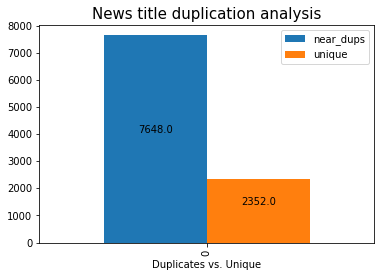

In [86]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'],
                align='center', width=0.8)
plt.xlabel("Duplicates vs. Unique")
ax.set_title('News title duplication analysis', fontsize=15)
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 
        
        
        

Medium jaccard distance


In [87]:
jaccard_distance = 0.5

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'),
#             col('datasetA.list_of_words').alias('words_A'),
#             col('datasetB.list_of_words').alias('words_B')
            )    

In [88]:
df_dups_50 = df_dups_text
df_dups_text.cache()
df_dups_text.limit(5).toPandas()

,distCol,id_A,id_B,text_A,text_B
0,0.0,2507,3506,(rt @coherentstates: c:\users\mkelley\onedrive...,(rt @geoffrbennett: new: harvard university pr...
1,0.0,2515,3424,(rt @alandersh: c:\users\mkelley\onedrive - ha...,(rt @geoffrbennett: new: harvard university pr...
2,0.0,2399,5234,(rt @alandersh: c:\users\mkelley\onedrive - ha...,(rt @persuadesenzo: khalid is just a sjava tha...
3,0.0,3587,3602,(rt @emeraldrobinson: president trump just con...,(rt @aoamerican: #harvard caught taking money ...
4,0.0,3569,3602,(@harvard i am 100% confident trump and his fo...,(rt @aoamerican: #harvard caught taking money ...


In [89]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.5 } jaccard distance:  7917
Unique titles based on { 0.5 } jaccard distance:  0.5 :  2083


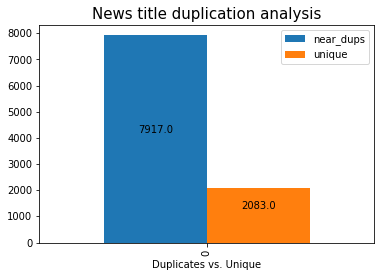

In [90]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'], align='center', width=0.8)
plt.xlabel("Duplicates vs. Unique")
ax.set_title('News title duplication analysis', fontsize=15)
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

#### High jaccard distance

In [91]:
jaccard_distance = 0.7

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'),
#             col('datasetA.list_of_words').alias('words_A'),
#             col('datasetB.list_of_words').alias('words_B')
            )    

In [92]:

df_dups_70 = df_dups_text
df_dups_text.cache()
df_dups_text.limit(5).toPandas()

,distCol,id_A,id_B,text_A,text_B
0,0.0,9453,9593,(rt @kaepernick7: thank you harvard university...,(rt @kaepernick7: thank you harvard university...
1,0.0,9520,9649,(rt @kaepernick7: thank you harvard university...,(rt @kaepernick7: thank you harvard university...
2,0.0,9426,9650,(rt @krassenstein: breaking: colin kaepernick...,(rt @blavity: so deserving 🏅@kaepernick7 and #...
3,0.0,9604,9646,(rt @kaepernick7: thank you harvard university...,(rt @kaepernick7: thank you harvard university...
4,0.0,9461,9716,(rt @theundefeated: boston @celtics forward ja...,(rt @savinthebees: fun fact:\n\na few years ag...


In [93]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.7 } jaccard distance:  9025
Unique titles based on { 0.7 } jaccard distance:  0.7 :  975


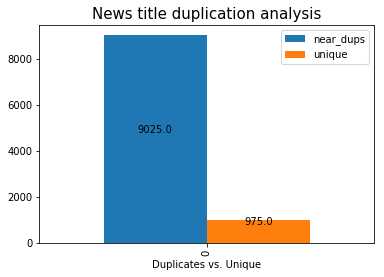

In [94]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'], align='center', width=0.8)
plt.xlabel("Duplicates vs. Unique")
ax.set_title('News title duplication analysis', fontsize=15)
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

In [95]:
df_dups_30_id = df_dups_30.select(col('id_A').alias('id_30_A'), col('id_B').alias('id_30_B'))
df_dups_50_id = df_dups_50.select(col('id_A').alias('id_50_A'), col('id_B').alias('id_50_B'))
df_dups_70_id = df_dups_70.select(col('text_A'), col('text_B'),\
                                  col('id_A').alias('id_70_A'), col('id_B').alias('id_70_B'))

print(df_dups_30_id.count())
print(df_dups_50_id.count())
print(df_dups_70_id.count())

605922
712288
890614


In [96]:
dups_combined = df_dups_70_id.join(df_dups_50_id, on=((df_dups_70_id.id_70_A == df_dups_50_id.id_50_A) & (df_dups_70_id.id_70_B == df_dups_50_id.id_50_B)), how="left_outer")\
.join(df_dups_30_id, on=((df_dups_70_id.id_70_A == df_dups_30_id.id_30_A) & (df_dups_70_id.id_70_B == df_dups_30_id.id_30_B)), how="left_outer")

dups_combined.limit(5).toPandas()

,text_A,text_B,id_70_A,id_70_B,id_50_A,id_50_B,id_30_A,id_30_B
0,(rt @nataliewhalen_: i am thrilled to announce...,"(rt @the_hindu: india-born gita gopinath, prof...",463,9077,NaN,NaN,NaN,NaN
1,"(rt @antifacoulter: good evening, ""the democra...",(scientists can create a perfect map of your g...,2055,2068,2055.0,2068.0,2055.0,2068.0
2,(stressed? the experts at the center for the d...,(rt @kaepernick7: thank you harvard university...,3198,9965,3198.0,9965.0,3198.0,9965.0
3,(rt @nick_kapur: making a big bet that climate...,(for our boston friends! steve venright will b...,7061,7105,7061.0,7105.0,7061.0,7105.0
4,(rt @fact: having no friends could be as deadl...,(rt @kaepernick7: thank you harvard university...,107,1916,107.0,1916.0,107.0,1916.0


#### Creating a duplicate vs non-duplicate flag for each similarity

In [97]:
dups_combined = dups_combined.\
withColumn("threshold_30",\
           when(col("id_30_A").isNotNull(), "Duplicate").
           otherwise("Non-Dup")).\
withColumn("threshold_50",\
           when(col("id_50_A").isNotNull(), "Duplicate").
           otherwise("Non-Dup")).\
withColumn("threshold_70",\
           when(col("id_70_A").isNotNull(), "Duplicate").
           otherwise("Non-Dup")).\
drop("id_30_A", "id_30_B", "id_50_A", "id_50_B", "id_70_A", "id_70_B")

dups_combined.limit(5).toPandas()

,text_A,text_B,threshold_30,threshold_50,threshold_70
0,(what activities help you reduce stress? here ...,(rt @alandersh: c:\users\mkelley\onedrive - ha...,Duplicate,Duplicate,Duplicate
1,(harvard university is creating robotic insect...,(rt @wef: harvard university counts 62 living ...,Non-Dup,Non-Dup,Duplicate
2,(harvard university is creating robotic insect...,(rt @saycheesedgtl: howard university defeats ...,Duplicate,Duplicate,Duplicate
3,(harvard university is creating robotic insect...,(rt @saycheesedgtl: howard university defeats ...,Duplicate,Duplicate,Duplicate
4,(harvard university is creating robotic insect...,(@ahtraelnashar how are we in real life please...,Duplicate,Duplicate,Duplicate


##### Select a sample of records across 3 thresholds (jaccard similarities):
* Records that are marked as duplicate by all three thresholds (meet the level of **threshold_30**)
* Records that are identified as non-duplicate by **threshold_30**, while being marked as dups by both **threshold_50** and **threshold_70**
* Records that are identified as non-duplicate by both **threshold_30** and **threshold_50**, while being marked as dups by **threshold_70**

In [98]:
dups_combined_sample = \
dups_combined.filter(("threshold_30 == 'Duplicate'")).sample(False, 0.1, 12345).limit(10).\
union\
(dups_combined.filter(("threshold_30 == 'Non-Dup' and threshold_50 == 'Duplicate'")).sample(False, 0.1, 12345).limit(10)).\
union\
(dups_combined.filter(("threshold_50 == 'Non-Dup'")).sample(False, 0.1, 12345).limit(10)).\
orderBy('threshold_30', 'threshold_50', 'threshold_70')

In [99]:
pd.set_option('display.max_rows', 30)
dups_combined_sample.limit(30).toPandas()

,text_A,text_B,threshold_30,threshold_50,threshold_70
0,(rt @naijaflyingdr: a harvard university study...,(rt @alandersh: c:\users\mkelley\onedrive - ha...,Duplicate,Duplicate,Duplicate
1,(rt @fact: having no friends could be as deadl...,(rt @ngr_facts: nike okundaye who owns nike ar...,Duplicate,Duplicate,Duplicate
2,(rt @its_bundi: mark zuckerberg dropped out of...,(harvard university scholarships 2019 (fully f...,Duplicate,Duplicate,Duplicate
3,(rt @sunchelsea: chelsea train at harvard univ...,(digital marketing strategy class at harvard p...,Duplicate,Duplicate,Duplicate
4,(rt @news24: zakes bantwini on being accepted ...,(washington post executive editor martin baron...,Duplicate,Duplicate,Duplicate
5,(rt @2morrowknight: harvard university is crea...,(lucille ball wows fans at harvard university ...,Duplicate,Duplicate,Duplicate
6,(rt @rmoswin: scientists at harvard university...,(rt @donqyoung: recent studies done by a group...,Duplicate,Duplicate,Duplicate
7,(rt @arrianna_planey: from a mandated citi tra...,(rt @realjameswoods: harvard university profes...,Duplicate,Duplicate,Duplicate
8,(https://t.co/xm9ipwcazz harvard university ha...,(rt @theroddick: @jessekellydc @yale let’s kee...,Duplicate,Duplicate,Duplicate
9,(rt @iamjoseh_: @oushda mimi nilisoma harvard ...,(just look who uses 🔝 https://t.co/kf2i61qkz8 ...,Duplicate,Duplicate,Duplicate


We can see some sample titles which are **marked as duplicate or non-duplicate by all the thresholds**.

The **first 10** titles, which are marked as "**duplicate**" by all the thresholds, they seem pretty similar. So **all** Jaccard distance thresholds of **0.3,0.5,0.7** seem to do **good work** for these titles.

These are followed by the **next 10** titles (**index 10 to 19**), we can observe that they are marked as "**non-duplicate**" for **0.3** threshold, but are marked "**duplicate**" for **0.5** and **0.7** thresholds. On further observation we can see that the titles have been incorrectly classified as duplicate for both **0.5 and 0.7 thresholds** 

For **last 10** titles (**index 20 to 29**), we see that they are marked as "**non-duplicate**" by the **0.3** threshold and **0.5** thresholds, but are classified as "**duplicate**" by **0.7** threshold. On further observation of the titles we can see that most of the titles are **non-duplicates**. So, the thresholds **0.3** and **0.5** correctly classify the records as non-duplicates.

Jaccard distance of **0.3** does a very good job for classifiying near-similar duplicates.

#### Jaccard distance - Stanford

In [46]:
raw_tweets = df_filtered.select('text',).filter('stanford == 1').limit(10000)
raw_tweets.show(5)

+--------------------+
|                text|
+--------------------+
|rt @jayworld05: t...|
|abbasi program in...|
|stanford universi...|
|1:2:1 - stanford ...|
|stanford universi...|
+--------------------+
only showing top 5 rows



#### Run similarity analysis on the “title” variable  
 - You can use either Jaccard or SimHash (or both to compare the results)  
 - Explain how you selected a similarity threshold for “near-duplicate”  
 - Build a bar-chart visualization for two variables (count of unique and count of “near-duplicate”)  
 - Build a histogram showing the overall distribution of “near-duplication”  

In [47]:
text = raw_tweets.rdd.map(lambda x : x['text']).filter(lambda x: x is not None)

StopWords = stopwords.words("english")

tokens = text\
    .map( lambda document: document.strip().lower())\
    .map( lambda document: re.split(" ", document))\
    .map( lambda word: [x for x in word if len(x) > 1] )\
    .zipWithIndex()

In [48]:
row = Row('text')
df_text = text.map(row).zipWithIndex().toDF(['text','id'])
df_text.show(5,truncate = False)

+--------------------------------------------------------------------------------------------------------------------------------------------------+---+
|text                                                                                                                                              |id |
+--------------------------------------------------------------------------------------------------------------------------------------------------+---+
|[rt @roblemvr: q&amp;a with jeremy bailenson: blurring the line between reality and illusion
stanford university's jeremy bailenson explores the…]|0  |
|[i was truly humbled to be invited to give a talk at stanford university about the life goes on foundation, our... https://t.co/99sxxjogoy]       |1  |
|[rt @johnhumphreys06: honored to have received an offer from stanford university !! #gocard #fearthetree https://t.co/obpdsuvw3x]                 |2  |
|[rt @stop_trump20: @danrunslong yes she has been identified, she is a dr at stanf

In [49]:
df_text.count()

10000

In [50]:
df_tokens = spark.createDataFrame(tokens, ["list_of_words",'id'])

#Drop records with no tokens
df_tokens = df_tokens.where(col('list_of_words').getItem(0).isNotNull())
df_tokens.limit(5).toPandas()

,list_of_words,id
0,"[stanford, university, fellow, henry, miller, ...",0
1,"[mt, \nstanford, university, fellow, henry, mi...",1
2,"[rt, @ncilla:, monsanto, caught, ghostwriting,...",2
3,"[#stanford, university, fellow, henry, miller,...",3
4,"[rt, @palan57:, monsanto, caught, ghostwriting...",4


#### Countvectorize to create features

In [51]:
vectorize = CountVectorizer(inputCol="list_of_words", outputCol="features", minDF=1.0)
df_vectorize = vectorize.fit(df_tokens).transform(df_tokens)

In [52]:
df_vectorize.limit(5).toPandas()

,list_of_words,id,features
0,"[rt, @libertyforall76:, stanford, university,,...",0,"(1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
1,"[#startup, david, doyle, of, heidenhain, corpo...",1,"(1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
2,"[rt, @myasu_nao:, dr., odette, harris, is, the...",2,"(1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, ..."
3,"[rt, @bertgroffman:, having, dinner, with, the...",3,"(1.0, 1.0, 1.0, 0.0, 2.0, 2.0, 0.0, 1.0, 0.0, ..."
4,"[rt, @ggsposed:, new, study, from, stanford, u...",4,"(1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


    Fitting MinHashLSH to create hash table

In [53]:
mh = MinHashLSH(inputCol="features", outputCol="hashes", numHashTables=5)
model = mh.fit(df_vectorize)
df_hashed = mh.fit(df_vectorize).transform(df_vectorize).cache()

In [54]:
df_hashed_text = df_text.join(df_hashed, "id", how = 'left').cache()
df_hashed_text.show(5)

+----+--------------------+--------------------+--------------------+--------------------+
|  id|                text|       list_of_words|            features|              hashes|
+----+--------------------+--------------------+--------------------+--------------------+
|  26|["adrienne mayor,...|[rt, @francismmax...|(17789,[0,2,4,6,1...|[[1.13061028E8], ...|
|  29|[she has also bee...|[rt, @francismmax...|(17789,[0,2,4,6,1...|[[1.13061028E8], ...|
| 474|[rt @craigrsawyer...|[rt, @kamalaharri...|(17789,[0,1,2,6,1...|[[5.4183431E7], [...|
| 964|[rt @latimes: two...|[rt, @xpress_edex...|(17789,[2,4,22,37...|[[3.46034128E8], ...|
|1677|[rt @spectatorind...|[rt, @kevincash__...|(17789,[1,2,4,5,6...|[[1.13061028E8], ...|
+----+--------------------+--------------------+--------------------+--------------------+
only showing top 5 rows



Evaluating similarity across three levels of similarities, low, medium and high Jaccard distances

In [55]:
jaccard_distance = 0.3

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'),
#             col('datasetA.list_of_words').alias('words_A'),
#             col('datasetB.list_of_words').alias('words_B')
            )

In [56]:
df_dups_30 = df_dups_text
df_dups_text.cache()
df_dups_text.limit(5).toPandas()

,distCol,id_A,id_B,text_A,text_B
0,0.0,3570,6235,(rt @mjxmaga2020: retweet to stanford universi...,(@flotus a new study from stanford university ...
1,0.0,3570,6248,(rt @mjxmaga2020: retweet to stanford universi...,(rt @nytimes: a group of stanford university e...
2,0.0,4402,4415,(rt @ts4openschools: 📢schools are safe\n📢schoo...,(condoleeza rice is a political science profes...
3,0.0,7326,7440,(rt @football__tweet: according to a stanford ...,(📍 stanford university is a private research u...
4,0.0,9595,9701,(rt @westall_sarahw: here is a very promising ...,"(rt @fdrlst: shelby steele, senior fellow at s..."


In [57]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.3 } jaccard distance:  6942
Unique titles based on { 0.3 } jaccard distance:  0.3 :  3058


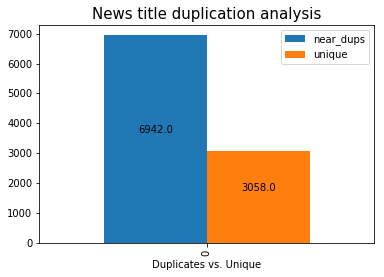

In [58]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'],
                align='center', width=0.8)
plt.xlabel("Duplicates vs. Unique")
ax.set_title('News title duplication analysis', fontsize=15)
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 
        
        
        

Medium jaccard distance


In [59]:
jaccard_distance = 0.5

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'),
#             col('datasetA.list_of_words').alias('words_A'),
#             col('datasetB.list_of_words').alias('words_B')
            )    

In [60]:
df_dups_50 = df_dups_text
df_dups_text.cache()
df_dups_text.limit(5).toPandas()

,distCol,id_A,id_B,text_A,text_B
0,0.312500,1096,4695,(rt @blaw: breaking: two stanford university s...,(rt @espnuk: according to a stanford universit...
1,0.312500,1096,4679,(rt @blaw: breaking: two stanford university s...,(rt @espnuk: according to a stanford universit...
2,0.000000,8196,8611,"(according to a study at stanford university, ...",(rt @gma: .@apple ceo @tim_cook gives inspirin...
3,0.090909,4672,4724,(rt @espnuk: according to a stanford universit...,(rt @espnuk: according to a stanford universit...
4,0.000000,4672,4679,(rt @espnuk: according to a stanford universit...,(rt @espnuk: according to a stanford universit...


In [61]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.5 } jaccard distance:  7188
Unique titles based on { 0.5 } jaccard distance:  0.5 :  2812


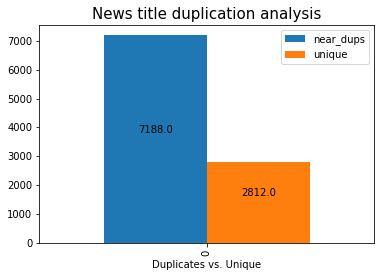

In [62]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'], align='center', width=0.8)
plt.xlabel("Duplicates vs. Unique")
ax.set_title('News title duplication analysis', fontsize=15)
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

#### High jaccard distance

In [63]:
jaccard_distance = 0.7

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'),
#             col('datasetA.list_of_words').alias('words_A'),
#             col('datasetB.list_of_words').alias('words_B')
            )    

In [64]:

df_dups_70 = df_dups_text
df_dups_text.cache()
df_dups_text.limit(5).toPandas()

,distCol,id_A,id_B,text_A,text_B
0,0.000000,6787,6821,"(s3 marketing stanford university,)",(rt @donovanmcmillo3: i’m extremely happy to a...
1,0.000000,5938,6795,(rt @nytimes: a group of stanford university e...,(rt @mnews_world: 🔻francis fukuyama is profess...
2,0.000000,6818,6824,(prof. ioannidis from stanford university on t...,(rt @johnruddick2: john ioannidis professor of...
3,0.000000,5936,6822,(rt @aaronbelkin: new stanford university stud...,(rt @africatechie: stanford university announc...
4,0.681818,2429,6805,(rt @kristinhelene: in remembrance of maryam m...,(rt @itu: itu and @stanford university to laun...


In [65]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.7 } jaccard distance:  8278
Unique titles based on { 0.7 } jaccard distance:  0.7 :  1722


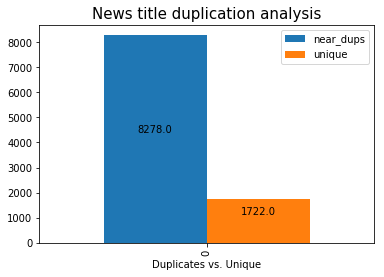

In [66]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'], align='center', width=0.8)
plt.xlabel("Duplicates vs. Unique")
ax.set_title('News title duplication analysis', fontsize=15)
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

In [67]:
df_dups_30_id = df_dups_30.select(col('id_A').alias('id_30_A'), col('id_B').alias('id_30_B'))
df_dups_50_id = df_dups_50.select(col('id_A').alias('id_50_A'), col('id_B').alias('id_50_B'))
df_dups_70_id = df_dups_70.select(col('text_A'), col('text_B'),\
                                  col('id_A').alias('id_70_A'), col('id_B').alias('id_70_B'))

print(df_dups_30_id.count())
print(df_dups_50_id.count())
print(df_dups_70_id.count())

358003
397674
529077


In [68]:
dups_combined = df_dups_70_id.join(df_dups_50_id, on=((df_dups_70_id.id_70_A == df_dups_50_id.id_50_A) & (df_dups_70_id.id_70_B == df_dups_50_id.id_50_B)), how="left_outer")\
.join(df_dups_30_id, on=((df_dups_70_id.id_70_A == df_dups_30_id.id_30_A) & (df_dups_70_id.id_70_B == df_dups_30_id.id_30_B)), how="left_outer")

dups_combined.limit(5).toPandas()

,text_A,text_B,id_70_A,id_70_B,id_50_A,id_50_B,id_30_A,id_30_B
0,(rt @ticiaverveer: a new @stanford university ...,(4 september 1998\ngoogle was founded by larry...,3208,7718,3208,7718,3208,7718
1,(rt @futbolbible: according to a stanford univ...,(rt @espnuk: according to a stanford universit...,4819,4833,4819,4833,4819,4833
2,"(rt @danlairdmd: chief of pain medicine, stanf...","(jon kosek, clinical professor emeritus of pat...",8844,8962,8844,8962,8844,8962
3,(rt @theinsaneapp: 🔥 stanford university vip m...,(rt @theinsaneapp: 🔥 stanford university vip m...,506,511,506,511,506,511
4,(rt @blaw: breaking: two stanford university s...,(rt @msnbc: breaking: two current stanford uni...,868,870,868,870,868,870


#### Creating a duplicate vs non-duplicate flag for each similarity

In [69]:
dups_combined = dups_combined.\
withColumn("threshold_30",\
           when(col("id_30_A").isNotNull(), "Duplicate").
           otherwise("Non-Dup")).\
withColumn("threshold_50",\
           when(col("id_50_A").isNotNull(), "Duplicate").
           otherwise("Non-Dup")).\
withColumn("threshold_70",\
           when(col("id_70_A").isNotNull(), "Duplicate").
           otherwise("Non-Dup")).\
drop("id_30_A", "id_30_B", "id_50_A", "id_50_B", "id_70_A", "id_70_B")

dups_combined.limit(5).toPandas()

,text_A,text_B,threshold_30,threshold_50,threshold_70
0,(rt @koshersoul: i am speaking at stanford uni...,"(rt @stenhelmfrid: professor ron davis, stanfo...",Non-Dup,Non-Dup,Duplicate
1,(rt @koshersoul: i am speaking at stanford uni...,(rt @ritika20_: researchers at the university ...,Duplicate,Duplicate,Duplicate
2,(anything &amp; everything psychology professo...,(rt @oromonyc: jawar’s graduation from @stanfo...,Duplicate,Duplicate,Duplicate
3,(anything &amp; everything psychology professo...,(rt @thomas1774paine: icymi - stanford univers...,Duplicate,Duplicate,Duplicate
4,(anything &amp; everything psychology professo...,(words i never thought would come out of my mo...,Duplicate,Duplicate,Duplicate


##### Select a sample of records across 3 thresholds (jaccard similarities):
* Records that are marked as duplicate by all three thresholds (meet the level of **threshold_30**)
* Records that are identified as non-duplicate by **threshold_30**, while being marked as dups by both **threshold_50** and **threshold_70**
* Records that are identified as non-duplicate by both **threshold_30** and **threshold_50**, while being marked as dups by **threshold_70**

In [70]:
dups_combined_sample = \
dups_combined.filter(("threshold_30 == 'Duplicate'")).sample(False, 0.1, 12345).limit(10).\
union\
(dups_combined.filter(("threshold_30 == 'Non-Dup' and threshold_50 == 'Duplicate'")).sample(False, 0.1, 12345).limit(10)).\
union\
(dups_combined.filter(("threshold_50 == 'Non-Dup'")).sample(False, 0.1, 12345).limit(10)).\
orderBy('threshold_30', 'threshold_50', 'threshold_70')

In [73]:
pd.set_option('display.max_rows', 30)
dups_combined_sample.limit(30).toPandas()

,text_A,text_B,threshold_30,threshold_50,threshold_70
0,(.@stanford university plans to be 100% solar ...,(on today’s edition of “getting angry w/ hank ...,Duplicate,Duplicate,Duplicate
1,"(rt @fnatic: 48 years ago today, the first eve...","(rt @fnatic: 48 years ago today, the first eve...",Duplicate,Duplicate,Duplicate
2,"(rt @theroot: say her name: chanel miller, the...",(@bitmexresearch get hourly free cryptocurrenc...,Duplicate,Duplicate,Duplicate
3,"(rt @fnatic: 48 years ago today, the first eve...","(rt @fnatic: 48 years ago today, the first eve...",Duplicate,Duplicate,Duplicate
4,"(rt @fnatic: 48 years ago today, the first eve...",(rt @andymonroe_: excited to announce that i w...,Duplicate,Duplicate,Duplicate
5,(rt @armitage_aaron: had an amazing visit this...,(words i never thought would come out of my mo...,Duplicate,Duplicate,Duplicate
6,"(rt @theroot: say her name: chanel miller, the...","(""undergraduate academic-year east asia flas f...",Duplicate,Duplicate,Duplicate
7,(rt @thomas1774paine: icymi - stanford univers...,(rt @ritika20_: researchers at the university ...,Duplicate,Duplicate,Duplicate
8,(rt @stanfordmed: michael lim has been appoint...,(rt @ritika20_: researchers at the university ...,Duplicate,Duplicate,Duplicate
9,(rt @aaranged: the video of the latest install...,(rt @nytimes: a group of stanford university e...,Duplicate,Duplicate,Duplicate


We can see some sample titles which are **marked as duplicate or non-duplicate by all the thresholds**.

The **first 10** titles, which are marked as "**duplicate**" by all the thresholds, they seem pretty similar. So **all** Jaccard distance thresholds of **0.3,0.5,0.7** seem to do **good work** for these titles.

These are followed by the **next 10** titles (**index 10 to 19**), we can observe that they are marked as "**non-duplicate**" for **0.3** threshold, but are marked "**duplicate**" for **0.5** and **0.7** thresholds. On further observation we can see that the titles have been incorrectly classified as duplicate for both **0.5 and 0.7 thresholds** 

For **last 10** titles (**index 20 to 29**), we see that they are marked as "**non-duplicate**" by the **0.3** threshold and **0.5** thresholds, but are classified as "**duplicate**" by **0.7** threshold. On further observation of the titles we can see that most of the titles are **non-duplicates**. So, the thresholds **0.3** and **0.5** correctly classify the records as non-duplicates.

Jaccard distance of **0.3** does a very good job for classifiying near-similar duplicates.

#### Jaccard distance - Northwestern

In [101]:
raw_tweets = df_filtered.select('text',).filter('northwesternu == 1').limit(10000)
raw_tweets.show(5)

+--------------------+
|                text|
+--------------------+
|congratulations t...|
|🏵🌹🌺🌼🌸 all ov...|
|rt @transplantjrn...|
|last, but certain...|
|wow! just had cof...|
+--------------------+
only showing top 5 rows



#### Run similarity analysis on the “title” variable  
 - You can use either Jaccard or SimHash (or both to compare the results)  
 - Explain how you selected a similarity threshold for “near-duplicate”  
 - Build a bar-chart visualization for two variables (count of unique and count of “near-duplicate”)  
 - Build a histogram showing the overall distribution of “near-duplication”  

In [102]:
text = raw_tweets.rdd.map(lambda x : x['text']).filter(lambda x: x is not None)

StopWords = stopwords.words("english")

tokens = text\
    .map( lambda document: document.strip().lower())\
    .map( lambda document: re.split(" ", document))\
    .map( lambda word: [x for x in word if len(x) > 1] )\
    .zipWithIndex()

In [103]:
row = Row('text')
df_text = text.map(row).zipWithIndex().toDF(['text','id'])
df_text.show(5,truncate = False)

+-----------------------------------------------------------------------------------------------------------------------------------+---+
|text                                                                                                                               |id |
+-----------------------------------------------------------------------------------------------------------------------------------+---+
|[police launch probe into mysterious death of northwestern university student https://t.co/3v4kqptudx]                             |0  |
|[police launch probe into mysterious death of northwestern university student via the @foxnews app https://t.co/wmm5xnedtf]        |1  |
|[police launch probe into mysterious death of northwestern university student https://t.co/bmd94lobdz via the @foxnews android app]|2  |
|[rt @foxnews: police launch probe into mysterious death of northwestern university student https://t.co/tybaeg9lez]                |3  |
|[#marketingjobs executive assista

In [104]:
df_text.count()

10000

In [105]:
df_tokens = spark.createDataFrame(tokens, ["list_of_words",'id'])

#Drop records with no tokens
df_tokens = df_tokens.where(col('list_of_words').getItem(0).isNotNull())
df_tokens.limit(5).toPandas()

,list_of_words,id
0,"[rt, @brycehopkins24:, blessed, to, say, that,...",0
1,"[rt, @_charlespreston:, this, thread, should, ...",1
2,"[researchers, at, northwestern, university, ha...",2
3,"[rt, @charliekirk11:, did, you, know:\n\na, ne...",3
4,"[rt, @ball_mizani:, am, extremely, proud, to, ...",4


#### Countvectorize to create features

In [106]:
vectorize = CountVectorizer(inputCol="list_of_words", outputCol="features", minDF=1.0)
df_vectorize = vectorize.fit(df_tokens).transform(df_tokens)

In [107]:
df_vectorize.limit(5).toPandas()

,list_of_words,id,features
0,"[job:, northwestern, university:, integrated, ...",0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[rt, @avogues:, northwestern, university:, htt...",1,"(1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[tse,, northwestern, university, �this, is, no...",2,"(1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[rt, @sciencecareers:, postdoctoral, fellow, c...",3,"(1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[rt, @_danalvarenga:, was, interviewed, on, ce...",4,"(1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, ..."


    Fitting MinHashLSH to create hash table

In [108]:
mh = MinHashLSH(inputCol="features", outputCol="hashes", numHashTables=5)
model = mh.fit(df_vectorize)
df_hashed = mh.fit(df_vectorize).transform(df_vectorize).cache()

In [109]:
df_hashed_text = df_text.join(df_hashed, "id", how = 'left').cache()
df_hashed_text.show(5)

+----+--------------------+--------------------+--------------------+--------------------+
|  id|                text|       list_of_words|            features|              hashes|
+----+--------------------+--------------------+--------------------+--------------------+
|  26|[rt @michaelmagau...|[rt, @travisakers...|(18142,[0,1,2,7,8...|[[7.3801195E7], [...|
|  29|[rt @lutherstrang...|[rt, @charliekirk...|(18142,[0,1,2,3,2...|[[2674648.0], [1....|
| 474|[rt @chicagotribu...|[rt, @brithume:, ...|(18142,[0,1,3,5,6...|[[2674648.0], [7....|
| 964|[3 professors fro...|[rt, @uberfacts:,...|(18142,[0,1,2,3,4...|[[2674648.0], [4....|
|1677|[he went to north...|[can, you, recomm...|(18142,[0,2,3,14,...|[[2674648.0], [1....|
+----+--------------------+--------------------+--------------------+--------------------+
only showing top 5 rows



Evaluating similarity across three levels of similarities, low, medium and high Jaccard distances

In [110]:
jaccard_distance = 0.3

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'),
#             col('datasetA.list_of_words').alias('words_A'),
#             col('datasetB.list_of_words').alias('words_B')
            )

In [111]:
df_dups_30 = df_dups_text
df_dups_text.cache()
df_dups_text.limit(5).toPandas()

,distCol,id_A,id_B,text_A,text_B
0,0.0,1362,3290,(rt @kevinbshields: @sethabramson dr. robert m...,(rt @csaviochan: please rt: the chan lab (http...
1,0.0,1362,1540,(rt @kevinbshields: @sethabramson dr. robert m...,(after nearly 13 years at northwestern univers...
2,0.0,1501,9673,(he went to northwestern university on a footb...,(northwestern university man cave tailgater ru...
3,0.0,1501,1586,(he went to northwestern university on a footb...,(rt @nephesh__: on who i just got accepted int...
4,0.0,1501,3369,(he went to northwestern university on a footb...,(rt @belt_publishing: this friday (aug. 16) jo...


In [112]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.3 } jaccard distance:  6972
Unique titles based on { 0.3 } jaccard distance:  0.3 :  3028


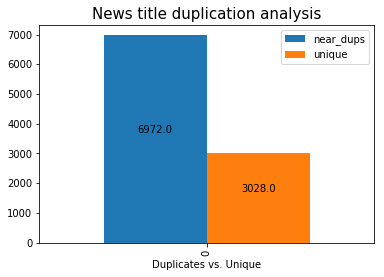

In [113]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'],
                align='center', width=0.8)
plt.xlabel("Duplicates vs. Unique")
ax.set_title('News title duplication analysis', fontsize=15)
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 
        
        
        

Medium jaccard distance


In [114]:
jaccard_distance = 0.5

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'),
#             col('datasetA.list_of_words').alias('words_A'),
#             col('datasetB.list_of_words').alias('words_B')
            )    

In [115]:
df_dups_50 = df_dups_text
df_dups_text.cache()
df_dups_text.limit(5).toPandas()

,distCol,id_A,id_B,text_A,text_B
0,0.000000,6429,6433,(rt @csaviochan: please rt: the chan lab (http...,"(2021 nfl draft prospect interview: jr pace, s..."
1,0.000000,884,885,(rt @lostblackboy: joseph epstein’s wsj op-ed ...,(rt @lostblackboy: joseph epstein’s wsj op-ed ...
2,0.000000,998,1008,(end of regulation: green bay 2 / northwestern...,(rt @thedailynu: ad: northwestern university p...
3,0.000000,562,678,(rt @nwschicago: for reference: here's the cam...,"(university, texas a&amp;m university, northwe..."
4,0.384615,5749,8550,"(@revrrlewis and of note, this is not northwes...","(northwestern university students, #senior cit..."


In [116]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.5 } jaccard distance:  7055
Unique titles based on { 0.5 } jaccard distance:  0.5 :  2945


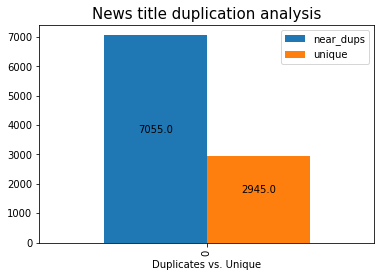

In [117]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'], align='center', width=0.8)
plt.xlabel("Duplicates vs. Unique")
ax.set_title('News title duplication analysis', fontsize=15)
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

#### High jaccard distance

In [118]:
jaccard_distance = 0.7

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'),
#             col('datasetA.list_of_words').alias('words_A'),
#             col('datasetB.list_of_words').alias('words_B')
            )    

In [119]:

df_dups_70 = df_dups_text
df_dups_text.cache()
df_dups_text.limit(5).toPandas()

,distCol,id_A,id_B,text_A,text_B
0,0.0,4874,5297,(rt @barstooldw: lebron james with a high scho...,(rt @cmclymer: i completely missed the ass-who...
1,0.0,4945,5411,(rt @travisakers: an 11-year-old rape victim i...,(rt @scholarshipsgl: https://t.co/pck4a9hcx8 f...
2,0.0,4889,5549,"(rt @305local: @gaitamimi1 @hrw in addition, t...",(rt @hipsterbeta: lf work in esports!\n\nbackg...
3,0.0,4954,5484,(#northwestern university's student paper shut...,(rt @phil_rosenthal: let's not forget it's no ...
4,0.0,4815,5059,(rt @alufkwabenabey: daniel immerwahr is an as...,(rt @asanews: asa is pleased to announce aldon...


In [120]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.7 } jaccard distance:  8238
Unique titles based on { 0.7 } jaccard distance:  0.7 :  1762


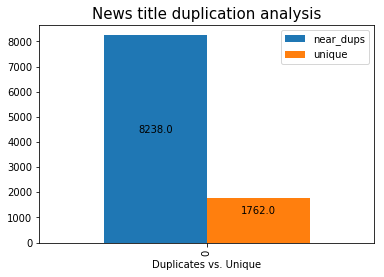

In [121]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'], align='center', width=0.8)
plt.xlabel("Duplicates vs. Unique")
ax.set_title('News title duplication analysis', fontsize=15)
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

In [122]:
df_dups_30_id = df_dups_30.select(col('id_A').alias('id_30_A'), col('id_B').alias('id_30_B'))
df_dups_50_id = df_dups_50.select(col('id_A').alias('id_50_A'), col('id_B').alias('id_50_B'))
df_dups_70_id = df_dups_70.select(col('text_A'), col('text_B'),\
                                  col('id_A').alias('id_70_A'), col('id_B').alias('id_70_B'))

print(df_dups_30_id.count())
print(df_dups_50_id.count())
print(df_dups_70_id.count())

654712
598752
853073


In [123]:
dups_combined = df_dups_70_id.join(df_dups_50_id, on=((df_dups_70_id.id_70_A == df_dups_50_id.id_50_A) & (df_dups_70_id.id_70_B == df_dups_50_id.id_50_B)), how="left_outer")\
.join(df_dups_30_id, on=((df_dups_70_id.id_70_A == df_dups_30_id.id_30_A) & (df_dups_70_id.id_70_B == df_dups_30_id.id_30_B)), how="left_outer")

dups_combined.limit(5).toPandas()

,text_A,text_B,id_70_A,id_70_B,id_50_A,id_50_B,id_30_A,id_30_B
0,(rt @peteln22: excited to announce that i will...,(great learning collaborates with northwestern...,3063,8378,3063,8378,3063,8378
1,(rt @lostblackboy: joseph epstein’s wsj op-ed ...,(rt @iamcamsmith: beyond blessed to receive my...,7471,7902,7471,7902,7471,7902
2,(rt @trayvon7moss: #agtg honored to receive my...,(after cheerleaders’ claims of sexual harassme...,7855,7865,7855,7865,7855,7865
3,(rt @habibi_mo48: 📌4.40 gpa\n📌going to northwe...,(rt @nydailynews: update: illinois police are ...,8395,9269,8395,9269,8395,9269
4,(toxic proteins affect memory: northwestern un...,"(rt @stanfordmed: a survey of over 40,000 peop...",1729,3141,1729,3141,1729,3141


#### Creating a duplicate vs non-duplicate flag for each similarity

In [124]:
dups_combined = dups_combined.\
withColumn("threshold_30",\
           when(col("id_30_A").isNotNull(), "Duplicate").
           otherwise("Non-Dup")).\
withColumn("threshold_50",\
           when(col("id_50_A").isNotNull(), "Duplicate").
           otherwise("Non-Dup")).\
withColumn("threshold_70",\
           when(col("id_70_A").isNotNull(), "Duplicate").
           otherwise("Non-Dup")).\
drop("id_30_A", "id_30_B", "id_50_A", "id_50_B", "id_70_A", "id_70_B")

dups_combined.limit(5).toPandas()

,text_A,text_B,threshold_30,threshold_50,threshold_70
0,(rt @johnkavanah: a big thank you to northwest...,(rt @lostblackboy: joseph epstein’s wsj op-ed ...,Non-Dup,Non-Dup,Duplicate
1,(competition puts customer service at the top ...,(rt @michaelmagausn: 🌬️ a weather report 🌨️\n\...,Duplicate,Duplicate,Duplicate
2,(competition puts customer service at the top ...,(rt @breakingnnow: #breaking: reports of a gun...,Duplicate,Duplicate,Duplicate
3,(rt @michaelmagausn: 🌬️ a weather report 🌨️\n\...,(congratulations to dr. allen w heinemann of n...,Duplicate,Duplicate,Duplicate
4,(rt @michaelmagausn: 🌬️ a weather report 🌨️\n\...,(rt @davidgura: a statement from northwestern ...,Duplicate,Duplicate,Duplicate


##### Select a sample of records across 3 thresholds (jaccard similarities):
* Records that are marked as duplicate by all three thresholds (meet the level of **threshold_30**)
* Records that are identified as non-duplicate by **threshold_30**, while being marked as dups by both **threshold_50** and **threshold_70**
* Records that are identified as non-duplicate by both **threshold_30** and **threshold_50**, while being marked as dups by **threshold_70**

In [125]:
dups_combined_sample = \
dups_combined.filter(("threshold_30 == 'Duplicate'")).sample(False, 0.1, 12345).limit(10).\
union\
(dups_combined.filter(("threshold_30 == 'Non-Dup' and threshold_50 == 'Duplicate'")).sample(False, 0.1, 12345).limit(10)).\
union\
(dups_combined.filter(("threshold_50 == 'Non-Dup'")).sample(False, 0.1, 12345).limit(10)).\
orderBy('threshold_30', 'threshold_50', 'threshold_70')

In [127]:
pd.set_option('display.max_rows', 30)
dups_combined_sample.limit(30).toPandas()

,text_A,text_B,threshold_30,threshold_50,threshold_70
0,(rt @realsaavedra: daryl morey's educational a...,(rt @realsaavedra: daryl morey's educational a...,Duplicate,Duplicate,Duplicate
1,(rt @kaindeb: @gautschil @12lk_ it was because...,(rt @eb4prez: northwestern university… establi...,Duplicate,Duplicate,Duplicate
2,(rt @ceej_jayy: for anybody that went to north...,(rt @eb4prez: northwestern university… establi...,Duplicate,Duplicate,Duplicate
3,(northwestern university researchers add new l...,(rt @realsaavedra: daryl morey's educational a...,Duplicate,Duplicate,Duplicate
4,(geologist christopher scotese at northwestern...,(rt @wral: new story: durham girl dies at nort...,Duplicate,Duplicate,Duplicate
5,(northwestern university found that up to 80% ...,(rt @colinbphoto: i should be writing a spanis...,Duplicate,Duplicate,Duplicate
6,(rt @ceej_jayy: for anybody that went to north...,(rt @realsaavedra: daryl morey's educational a...,Duplicate,Duplicate,Duplicate
7,(coronavirus: northwestern university scientis...,(rt @realsaavedra: daryl morey's educational a...,Duplicate,Duplicate,Duplicate
8,(rt @michaelmagausn: 🌬️ a weather report 🌨️\n\...,(rt @cmclymer: i completely missed the ass-who...,Duplicate,Non-Dup,Duplicate
9,(rt @ebean08: extremely blessed to receive an ...,(rt @wgnnews: just in: 2nd northwestern univer...,Duplicate,Non-Dup,Duplicate


We can see some sample titles which are **marked as duplicate or non-duplicate by all the thresholds**.

The **first 10** titles, which are marked as "**duplicate**" by all the thresholds, they seem pretty similar. So **all** Jaccard distance thresholds of **0.3,0.5,0.7** seem to do **good work** for these titles.

These are followed by the **next 10** titles (**index 10 to 19**), we can observe that they are marked as "**non-duplicate**" for **0.3** threshold, but are marked "**duplicate**" for **0.5** and **0.7** thresholds. On further observation we can see that the titles have been incorrectly classified as duplicate for both **0.5 and 0.7 thresholds** 

For **last 10** titles (**index 20 to 29**), we see that they are marked as "**non-duplicate**" by the **0.3** threshold and **0.5** thresholds, but are classified as "**duplicate**" by **0.7** threshold. On further observation of the titles we can see that most of the titles are **non-duplicates**. So, the thresholds **0.3** and **0.5** correctly classify the records as non-duplicates.

Jaccard distance of **0.3** does a very good job for classifiying near-similar duplicates.